In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from yellowbrick.cluster.elbow import kelbow_visualizer

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)
#pd.reset_option('all')
#pd.set_option('float_format', '{:.2f}'.format)

In [11]:
# ver.3
df_ver3 = pd.read_csv('N:/Í∞úÏù∏/DA/ÎÇ¥Î∞∞Ï∫†/5. ÏµúÏ¢Ö ÌîÑÎ°úÏ†ùÌä∏/after_cleansing/ÌÜµÌï©Î≥∏/6. real_final_dataset/real_fin_dataset(ver.3)(24.04.18).csv', index_col=0)

# for streamlit dataset
df_ver3_info = df_ver3[['Platform', 'Number', 'Store', 'Address', 'Addr', 'ID', 'Date', 'Review_text', 'Review_score', 'Time', 'sentiment']]

In [4]:
# ver.4
df_anal = pd.read_csv('N:/Í∞úÏù∏/DA/ÎÇ¥Î∞∞Ï∫†/5. ÏµúÏ¢Ö ÌîÑÎ°úÏ†ùÌä∏/after_cleansing/ÌÜµÌï©Î≥∏/6. real_final_dataset/real_fin_dataset(ver.4)(24.04.18)(review_counts, review_score, slopeÎßå Ïä§ÏºÄÏùºÎßÅ).csv', index_col=0)

In [6]:
# ver.5
df_anal = pd.read_csv('N:/Í∞úÏù∏/DA/ÎÇ¥Î∞∞Ï∫†/5. ÏµúÏ¢Ö ÌîÑÎ°úÏ†ùÌä∏/after_cleansing/ÌÜµÌï©Î≥∏/6. real_final_dataset/real_fin_dataset(ver.5)(24.04.18)(sentiment Ï†úÏô∏ Î™®Îëê Ïä§ÏºÄÏùºÎßÅ).csv', index_col=0)

In [5]:
# ÏµúÏ¢Ö ÏÑ†Ï†ï Ïª¨Îüº
df_anal = df_anal[['Review_score', 'bread', 'beverage', 'view', 'atmosphere', 'friendly', 'clean_store', 'restroom_clean', 'parking', 'spacious_store', 'plenty_seats', 'comfortable_seats',\
     'special_menu', 'photo', 'good_music', 'reservation_possible', 'beautiful_interior', 'price', 'wait']]

In [12]:
df_ver3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15227 entries, 0 to 15226
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Platform              15227 non-null  object 
 1   Number                15227 non-null  int64  
 2   Store                 15227 non-null  object 
 3   Address               15227 non-null  object 
 4   Addr                  15227 non-null  object 
 5   Review_score          15227 non-null  float64
 6   Review_counts         15227 non-null  int64  
 7   ID                    15227 non-null  object 
 8   Date                  15227 non-null  object 
 9   Review_text           15227 non-null  object 
 10  Time                  15227 non-null  object 
 11  slope                 15227 non-null  float64
 12  bread                 15227 non-null  float64
 13  beverage              15227 non-null  float64
 14  vegan                 15227 non-null  float64
 15  no_senior          

In [6]:
df_anal

Review_score  bread  beverage  view  atmosphere  friendly  clean_store  \
0         -0.041896    0.0       0.0     0           0         0            0   
1         -0.041896   10.0     100.0     0           0         0            0   
2         -0.041896    0.0     -50.0     0           0         0            0   
3         -0.041896    0.0       0.0     0           0         0            0   
4         -0.041896   10.0       0.0     0           0         0          100   
...             ...    ...       ...   ...         ...       ...          ...   
15222      0.266992   50.0       0.0     0           0         0            0   
15223      0.266992  100.0     100.0     0           0         0            0   
15224      0.266992   50.0       0.0     0           0        50            0   
15225      0.266992   50.0       0.0     0           0         0            0   
15226      0.266992    0.0       0.0     0           0        50            0   

       restroom_clean  parking  spacious_store  plenty_seats  \
0                   0        0               0             0   
1                   0        0               0             0   
2                   0        0               0             0   
3                   0        0               0             0   
4                   0        0               0             0   
...               ...      ...             ...           ...   
15222               0        0               0             0   
15223               0        0               0             0   
15224               0        0               0             0   
15225               0        0               0             0   
15226               0        0               0             0   

       comfortable_seats  special_menu  photo  good_music  \
0                      0             0      0           0   
1                      0             0      0           0   
2                      0             0      0           0   
3                      0             0      0           0   
4                      0             0      0           0   
...                  ...           ...    ...         ...   
15222                  0             0      0           0   
15223                  0             0      0           0   
15224                  0             0      0           0   
15225                  0             0      0           0   
15226                  0             0      0           0   

       reservation_possible  beautiful_interior  price  wait  
0                         0                   0      0     0  
1                         0                   0      0     0  
2                         0                   0      0     0  
3                         0                   0      0     0  
4                         0                 100    100     0  
...                     ...                 ...    ...   ...  
15222                     0                   0      0     0  
15223                     0                   0      0     0  
15224                     0                   0     50     0  
15225                     0                   0      0     0  
15226                     0                   0      0     0  

[15227 rows x 19 columns]

Î∞îÎ°ú clustering Îã®Í≥ÑÎ°ú ÎÑòÏñ¥Í∞ÄÎ©¥ Îê®

# EDA

In [142]:
df_ver3.drop(['Platform', 'Number', 'Store', 'Address', 'Addr', 'ID', 'Date', 'Review_text', 'Review_counts', 'Time', 'bread_name', 'slope', 'vegan', 'no_senior', 'no_kids', 'pet', 'whole_wheat', 'unique_concept', 'health', 'sentiment'], axis=1, inplace=True)
df_ver3

Review_score  bread  beverage  view  atmosphere  friendly  clean_store  \
0               4.3    0.0       0.0     0           0         0            0   
1               4.3   10.0     100.0     0           0         0            0   
2               4.3    0.0     -50.0     0           0         0            0   
3               4.3    0.0       0.0     0           0         0            0   
4               4.3   10.0       0.0     0           0         0          100   
...             ...    ...       ...   ...         ...       ...          ...   
15222           4.4   50.0       0.0     0           0         0            0   
15223           4.4  100.0     100.0     0           0         0            0   
15224           4.4   50.0       0.0     0           0        50            0   
15225           4.4   50.0       0.0     0           0         0            0   
15226           4.4    0.0       0.0     0           0        50            0   

       restroom_clean  parking  spacious_store  plenty_seats  \
0                   0        0               0             0   
1                   0        0               0             0   
2                   0        0               0             0   
3                   0        0               0             0   
4                   0        0               0             0   
...               ...      ...             ...           ...   
15222               0        0               0             0   
15223               0        0               0             0   
15224               0        0               0             0   
15225               0        0               0             0   
15226               0        0               0             0   

       comfortable_seats  special_menu  photo  good_music  \
0                      0             0      0           0   
1                      0             0      0           0   
2                      0             0      0           0   
3                      0             0      0           0   
4                      0             0      0           0   
...                  ...           ...    ...         ...   
15222                  0             0      0           0   
15223                  0             0      0           0   
15224                  0             0      0           0   
15225                  0             0      0           0   
15226                  0             0      0           0   

       reservation_possible  beautiful_interior  price  wait  
0                         0                   0      0     0  
1                         0                   0      0     0  
2                         0                   0      0     0  
3                         0                   0      0     0  
4                         0                 100    100     0  
...                     ...                 ...    ...   ...  
15222                     0                   0      0     0  
15223                     0                   0      0     0  
15224                     0                   0     50     0  
15225                     0                   0      0     0  
15226                     0                   0      0     0  

[15227 rows x 19 columns]

In [140]:
df_ver3.describe()

Review_score  Review_counts         bread      beverage          view  \
count  15227.000000   15227.000000  15227.000000  15227.000000  15227.000000   
mean       4.313563    1227.422736     33.668155     12.556643      2.142904   
std        0.323753    2254.198131     44.333654     28.975422     13.617316   
min        2.000000       1.000000   -100.000000   -100.000000   -100.000000   
25%        4.300000     233.000000      0.000000      0.000000      0.000000   
50%        4.390000     413.000000      0.000000      0.000000      0.000000   
75%        4.430000    1411.000000     80.000000      0.000000      0.000000   
max        5.000000   20194.000000    100.000000    100.000000    100.000000   

         atmosphere      friendly   clean_store  restroom_clean      parking  \
count  15227.000000  15227.000000  15227.000000    15227.000000  15227.00000   
mean       6.593551      5.012806      1.163066        0.216720      0.00000   
std       23.581534     26.860891     14.315463        7.412012      8.10009   
min     -100.000000   -100.000000   -100.000000     -100.000000   -100.00000   
25%        0.000000      0.000000      0.000000        0.000000      0.00000   
50%        0.000000      0.000000      0.000000        0.000000      0.00000   
75%        0.000000      0.000000      0.000000        0.000000      0.00000   
max      100.000000    100.000000    100.000000      100.000000    100.00000   

       spacious_store  plenty_seats  comfortable_seats  special_menu  \
count    15227.000000  15227.000000       15227.000000  15227.000000   
mean         2.326131      0.661982           0.495173      0.130164   
std         15.478719      9.483153           9.262920      3.375023   
min       -100.000000   -100.000000        -100.000000      0.000000   
25%          0.000000      0.000000           0.000000      0.000000   
50%          0.000000      0.000000           0.000000      0.000000   
75%          0.000000      0.000000           0.000000      0.000000   
max        100.000000    100.000000         100.000000    100.000000   

              photo    good_music  reservation_possible  beautiful_interior  \
count  15227.000000  15227.000000          15227.000000        15227.000000   
mean       0.604847      0.243646              0.228541            3.404479   
std        8.418677      5.303083              5.149828           15.949957   
min     -100.000000   -100.000000           -100.000000          -50.000000   
25%        0.000000      0.000000              0.000000            0.000000   
50%        0.000000      0.000000              0.000000            0.000000   
75%        0.000000      0.000000              0.000000            0.000000   
max      100.000000    100.000000            100.000000          100.000000   

              price          wait  
count  15227.000000  15227.000000  
mean      -0.725750     -0.723058  
std       18.899804      7.324007  
min     -100.000000   -100.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max      100.000000    100.000000

### Ïª¨ÎüºÎ≥Ñ Î∂ÑÌè¨ ÌôïÏù∏

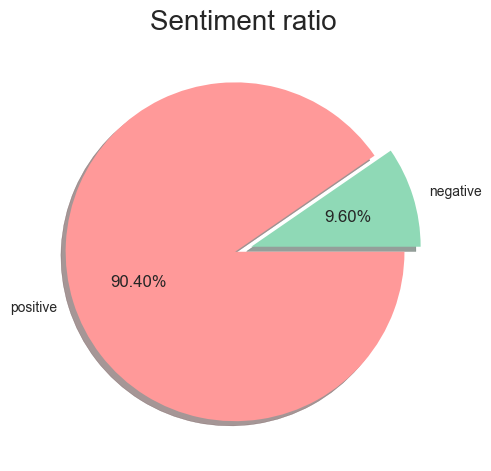

In [92]:
# sentiment
positive = len(df_ver3[df_ver3['sentiment'] == 1]) / len(df_ver3['sentiment'])
negative = len(df_ver3[df_ver3['sentiment'] == 0]) / len(df_ver3['sentiment'])
ratio = [positive, negative]
labels = ['positive', 'negative']
explode = [0.05, 0.05]
colors = ['#ff9999', '#8fd9b6']

plt.title("Sentiment ratio", fontsize=20)
plt.pie(ratio, labels=labels, autopct='%.2f%%', counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

##### Ïª¨Îüº ÏÇ≠Ï†ú Ïù¥Ïú†

'Review_score', 'bread', 'beverage', 'view', 'atmosphere', 'friendly', 'clean_store', 'restroom_clean', 'parking', 'spacious_store', 'plenty_seats', 'comfortable_seats',
'special_menu', 'photo', 'good_music', 'reservation_possible', 'beautiful_interior', 'price', 'wait'

 - **sentiment** : Îã§Î•∏ Ïª¨ÎüºÎì§Í≥º ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÎÜíÏïÑÏÑú
 - **vegan, no_senior, no_kids, pet, whole_wheat, health, unique_concept** : ÌäπÏÑ±Ïù¥ Î™ÖÌôïÌïòÏßÄ ÏïäÏïÑÏÑú(why? Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÜåÎüâ ÏàòÏßëÎêòÏñ¥ÏÑú)
 - **slope** : Í≥†ÏßÄÎåÄÏóê ÏúÑÏπòÌïú Í≥≥ÏùÄ ÌíçÍ≤ΩÏù¥ Ï¢ãÏùÄ Í≥≥Í≥º Ïó∞Í¥ÄÏù¥ ÏûàÏùÑ Í≤ÉÏúºÎ°ú ÏÉùÍ∞ÅÌïòÏó¨ ÎÑ£ÏóàÏúºÎÇò ÏµúÎåÄ Í≤ΩÏÇ¨ÎèÑÍ∞Ä 12ÎèÑÎ∞ñÏóê ÎêòÏßÄ ÏïäÏïÑ Ïú†ÏùòÎØ∏Ìïú Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï† Ïàò ÏóÜÏùÑ Í≤ÉÏúºÎ°ú ÌåêÎã®ÎèºÏÑú
 - **Review_score** : review_countsÎ≥¥Îã§Îäî review_scoreÍ∞Ä Îçî ÏòÅÌñ•ÏùÑ ÎßéÏù¥ ÎØ∏Ïπ† Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêòÏñ¥ review_counts Ï†úÍ±∞ ÌõÑ Ï∞®Ïõê Ï∂ïÏÜå ÏßÑÌñâÌñàÍ≥†, Ïª¨Îüº Ï†úÍ±∞ Ï†ÑÌõÑ Ï∞®Ïù¥ ÏóÜÏóàÏùå

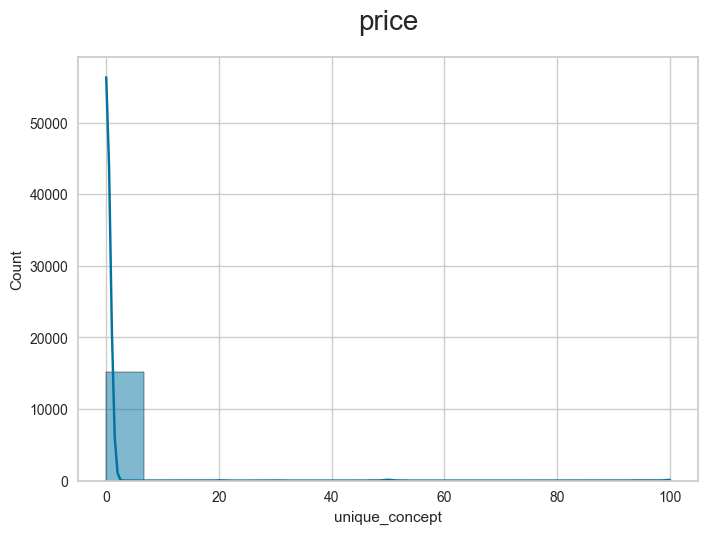

In [231]:
plt.title("price", fontsize=20, pad=20)
sns.histplot(data = df_ver3, x='unique_concept', kde=True)
plt.show()

### Ïª¨ÎüºÎ≥Ñ 0Í∞í Ï†úÍ±∞Ìïú ÏÉÅÌÉúÏóêÏÑúÏùò Î∂ÑÌè¨ ÌôïÏù∏

c:\Users\jeong hee lee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


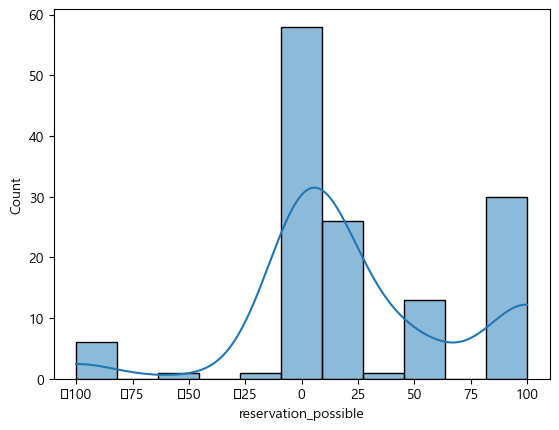

In [193]:
bb = df[df['reservation_possible']!=0]

sns.histplot(data = bb, x='reservation_possible', kde=True)
plt.show()

### Ï†ÑÏ≤¥ Ïª¨Îüº Î∂ÑÌè¨ ÌôïÏù∏

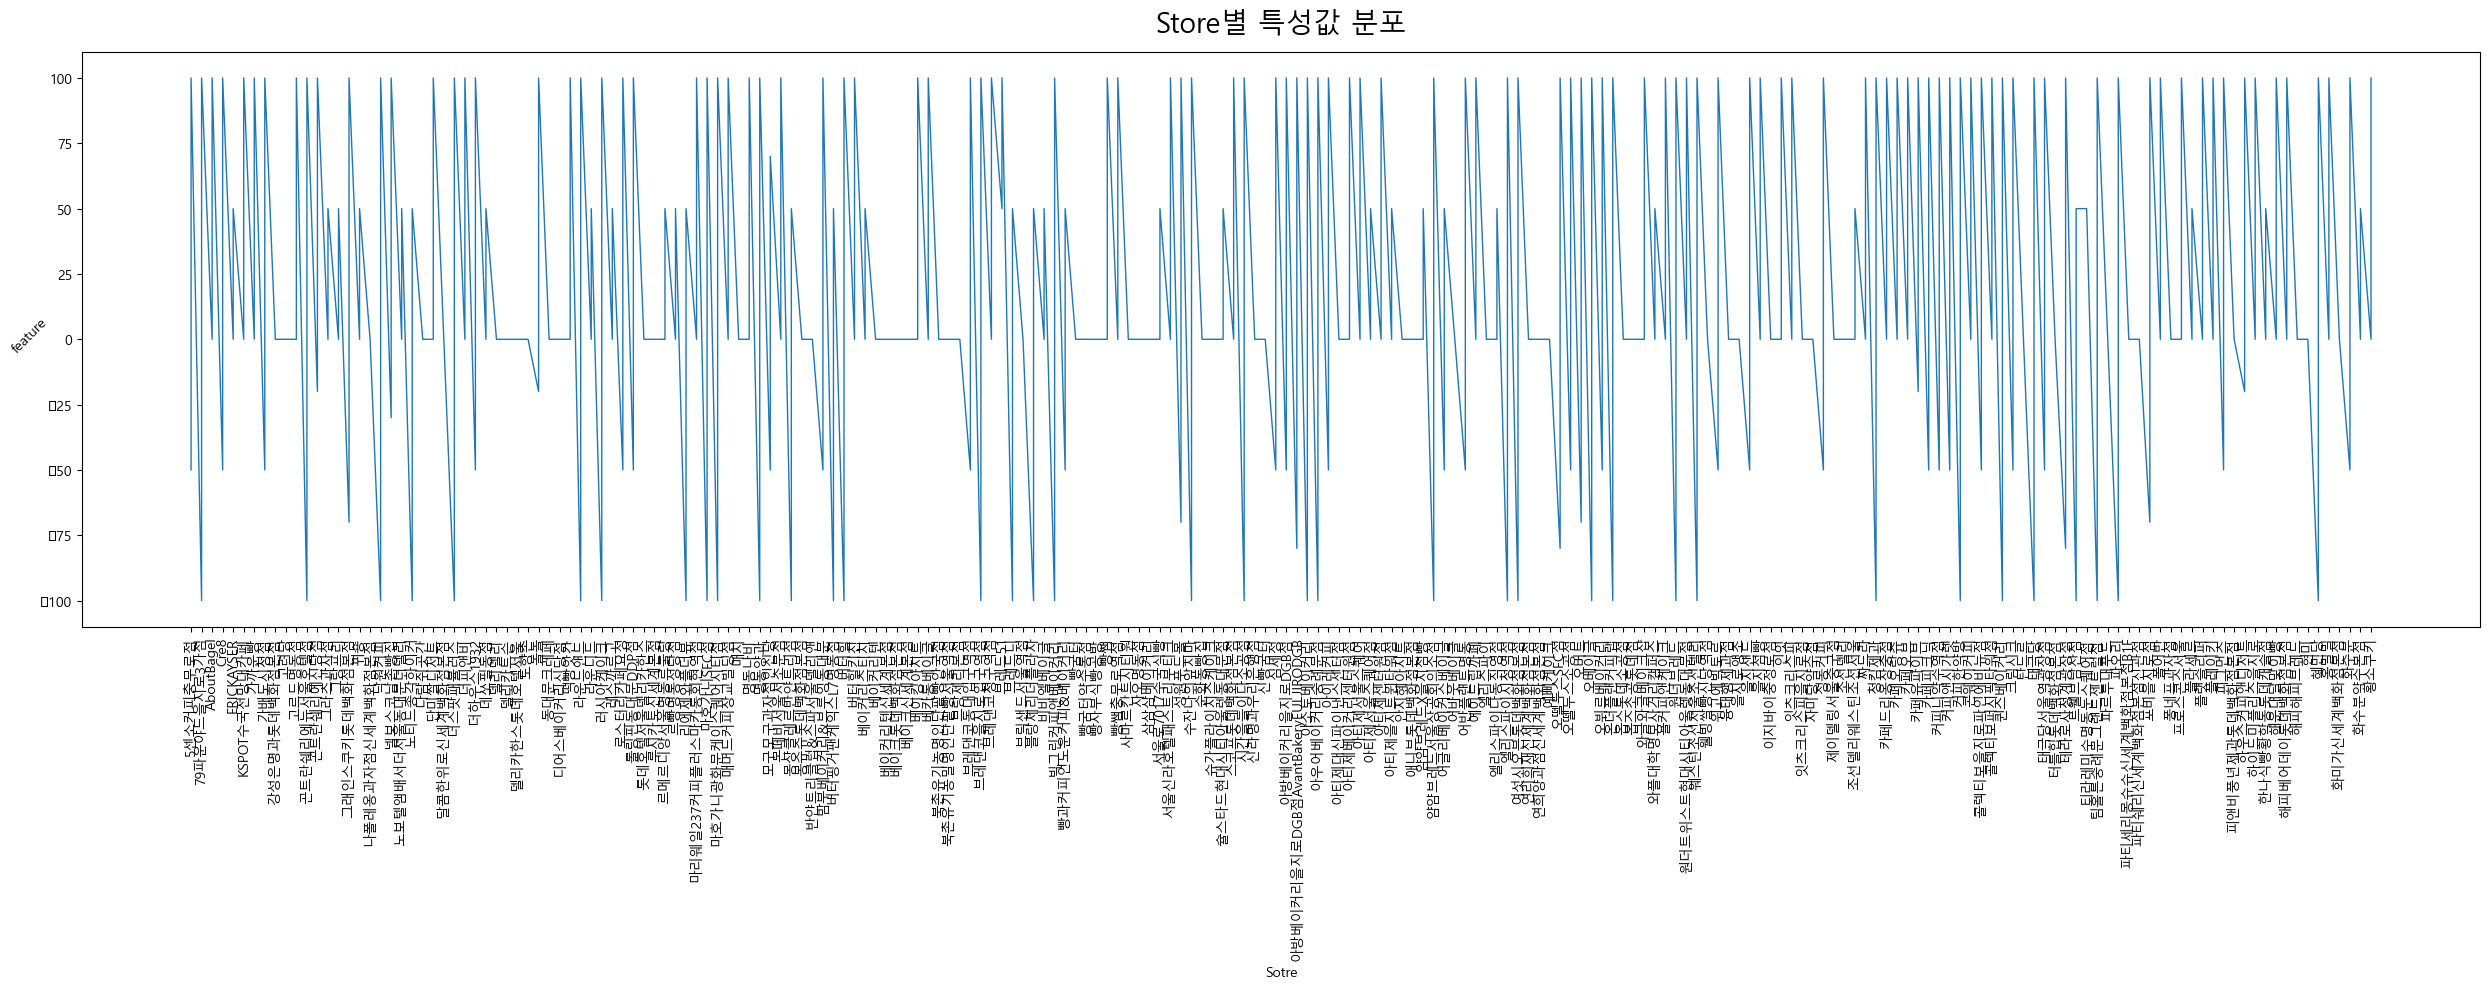

In [180]:
plt.figure(figsize=(25,10))
sns.lineplot(data=df, x='Store', y='beverage', estimator=None, lw=1)
plt.title('StoreÎ≥Ñ ÌäπÏÑ±Í∞í Î∂ÑÌè¨', fontsize=20, pad=15)
plt.xlabel('Sotre')
plt.ylabel('feature', rotation=45)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


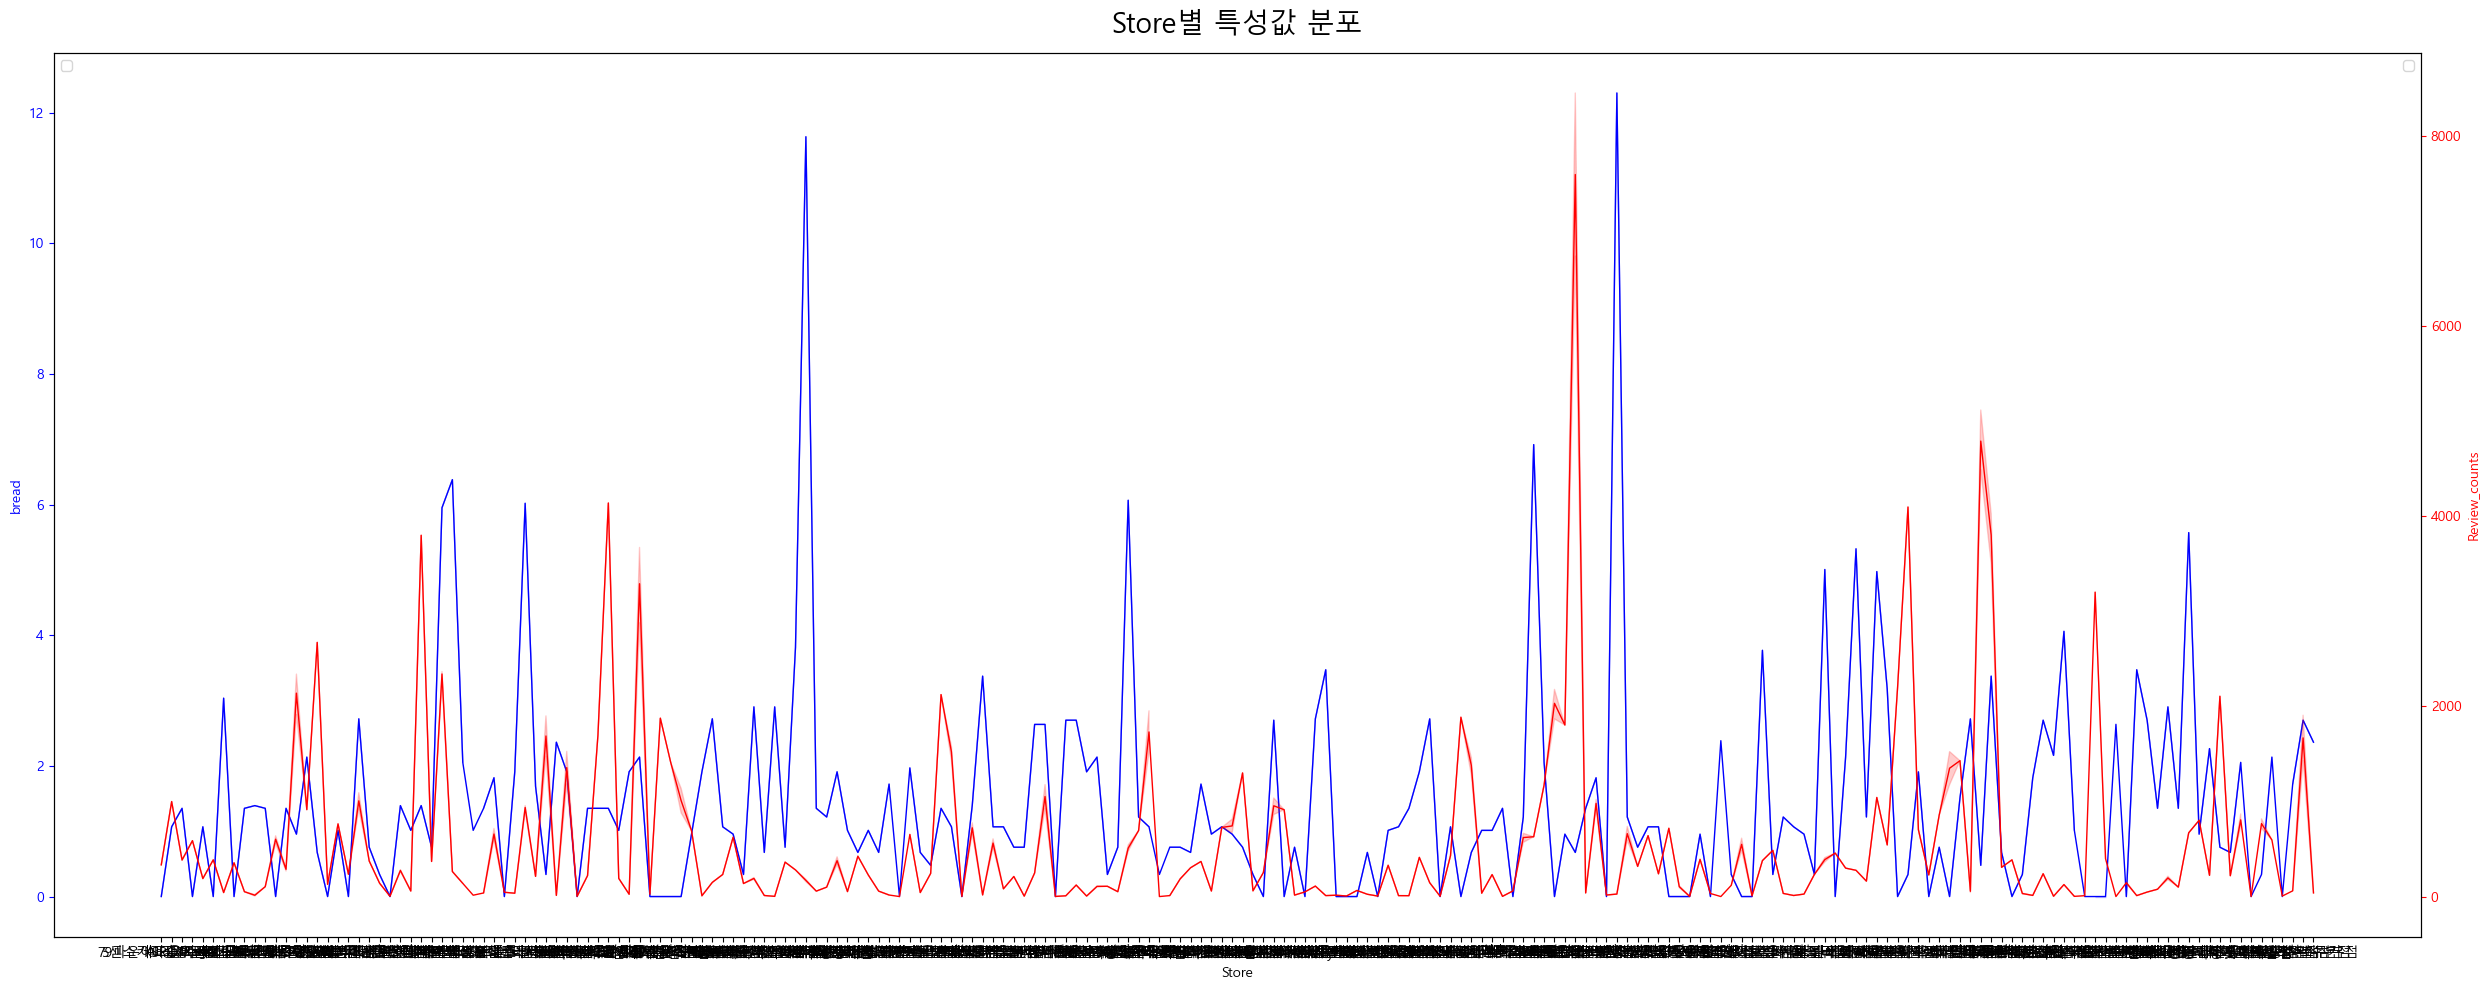

In [111]:
plt.figure(figsize=(25,10))

ax = sns.lineplot(data=df, x='Store', y='slope', color='blue', lw=1)
ax.set_title('StoreÎ≥Ñ ÌäπÏÑ±Í∞í Î∂ÑÌè¨', fontsize=20, pad=15)
ax.set_xlabel('Store')
ax.set_ylabel('bread', color = 'blue')
ax.tick_params(axis='y', colors = 'blue')

ax2 = ax.twinx()
sns.lineplot(data=df, x='Store', y='Review_counts', color='red', lw=1, ax=ax2)
ax2.set_ylabel('Review_counts', color = 'red')
ax2.tick_params(axis='y', colors='red')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Ïª¨Îüº ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏

In [208]:
#df_ver3_2 = df_ver3.drop(['Platform', 'Number', 'Store', 'Address', 'Review_text', 'ID', 'Date', 'Time', 'bread_name'], axis=1)
df_ver3_2 = df_ver3_2.drop(['Addr'], axis=1)
df_ver3_2

Review_score  Review_counts    slope  bread  beverage  vegan  \
0               4.3            334  0.00000    0.0       0.0    0.0   
1               4.3            334  0.00000   10.0     100.0    0.0   
2               4.3            334  0.00000    0.0     -50.0    0.0   
3               4.3            334  0.00000    0.0       0.0    0.0   
4               4.3            334  0.00000   10.0       0.0    0.0   
...             ...            ...      ...    ...       ...    ...   
15222           4.4             39  2.36245   50.0       0.0    0.0   
15223           4.4             39  2.36245  100.0     100.0    0.0   
15224           4.4             39  2.36245   50.0       0.0    0.0   
15225           4.4             39  2.36245   50.0       0.0    0.0   
15226           4.4             39  2.36245    0.0       0.0    0.0   

       no_senior  no_kids  pet  whole_wheat  view  atmosphere  friendly  \
0              0        0    0            0     0           0         0   
1              0        0    0            0     0           0         0   
2              0        0    0            0     0           0         0   
3              0        0    0            0     0           0         0   
4              0        0    0            0     0           0         0   
...          ...      ...  ...          ...   ...         ...       ...   
15222          0        0    0            0     0           0         0   
15223          0        0    0            0     0           0         0   
15224          0        0    0            0     0           0        50   
15225          0        0    0            0     0           0         0   
15226          0        0    0            0     0           0        50   

       clean_store  restroom_clean  parking  spacious_store  plenty_seats  \
0                0               0        0               0             0   
1                0               0        0               0             0   
2                0               0        0               0             0   
3                0               0        0               0             0   
4              100               0        0               0             0   
...            ...             ...      ...             ...           ...   
15222            0               0        0               0             0   
15223            0               0        0               0             0   
15224            0               0        0               0             0   
15225            0               0        0               0             0   
15226            0               0        0               0             0   

       comfortable_seats  special_menu  photo  good_music  \
0                      0             0      0           0   
1                      0             0      0           0   
2                      0             0      0           0   
3                      0             0      0           0   
4                      0             0      0           0   
...                  ...           ...    ...         ...   
15222                  0             0      0           0   
15223                  0             0      0           0   
15224                  0             0      0           0   
15225                  0             0      0           0   
15226                  0             0      0           0   

       reservation_possible  unique_concept  beautiful_interior  price  wait  \
0                         0               0                   0      0     0   
1                         0               0                   0      0     0   
2                         0               0                   0      0     0   
3                         0               0                   0      0     0   
4                         0               0                 100    100     0   
...                     ...             ...                 ...    ...   ...   
15222                     0        

<Axes: >

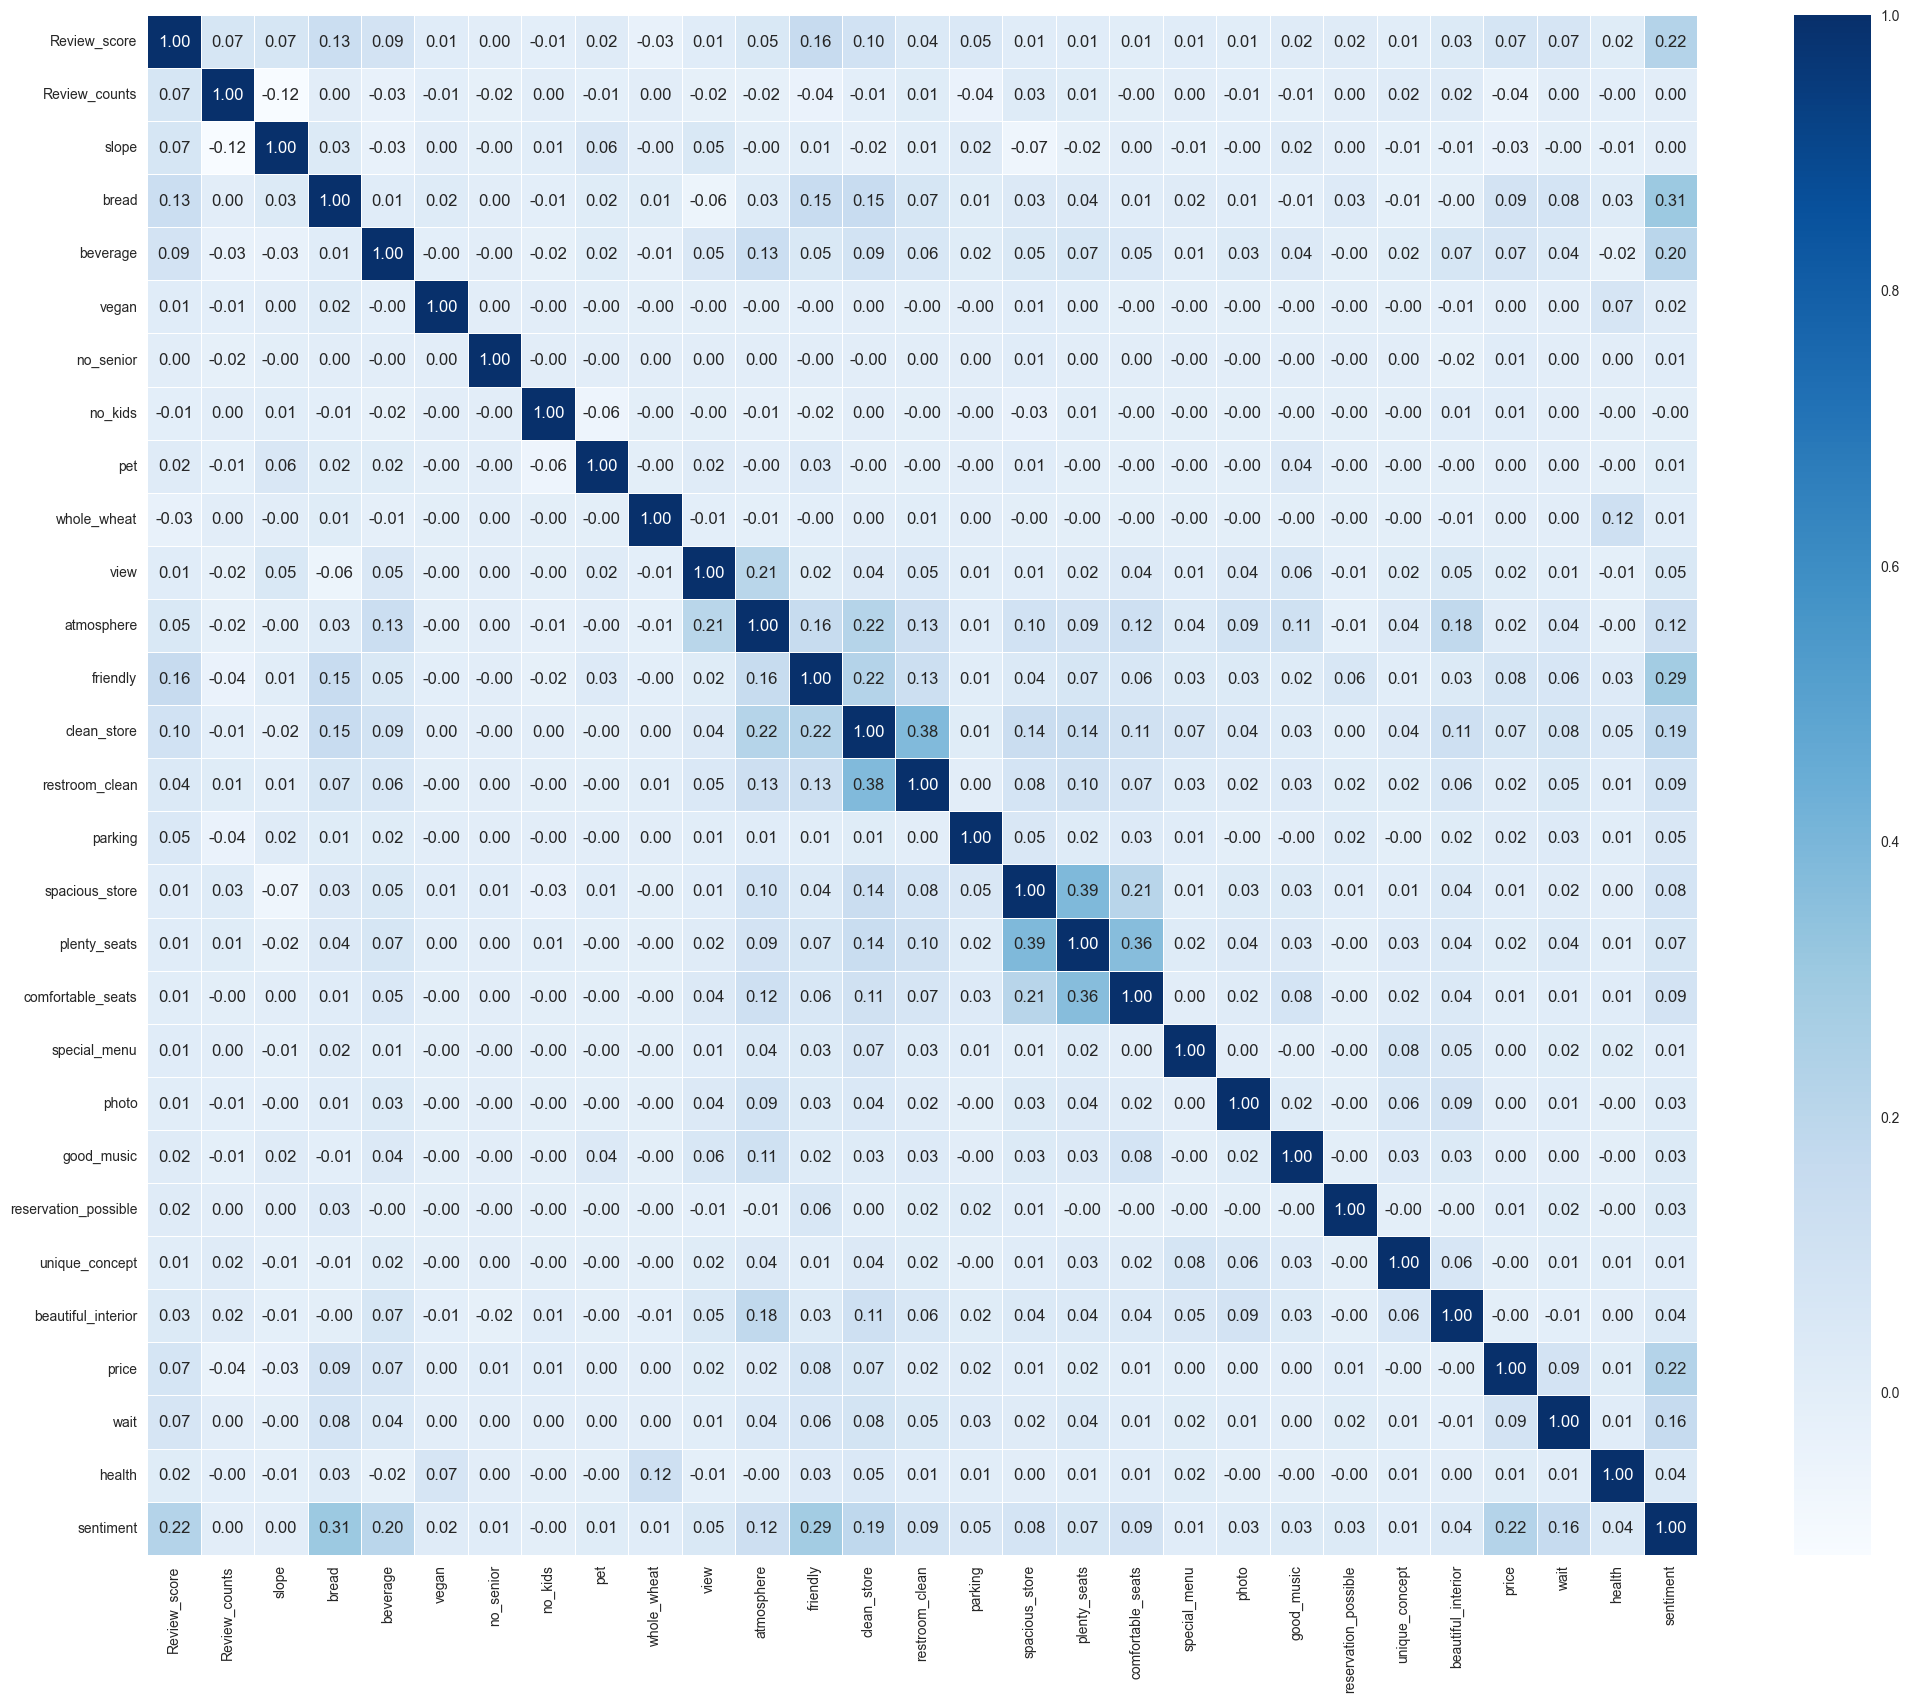

In [210]:
plt.figure(figsize=(25, 20))
sns.heatmap(data = df_ver3_2.corr(), annot=True, fmt= '.2f', linewidths=.5, cmap='Blues')

### Ìïú ÎààÏóê Î≥¥Í∏∞

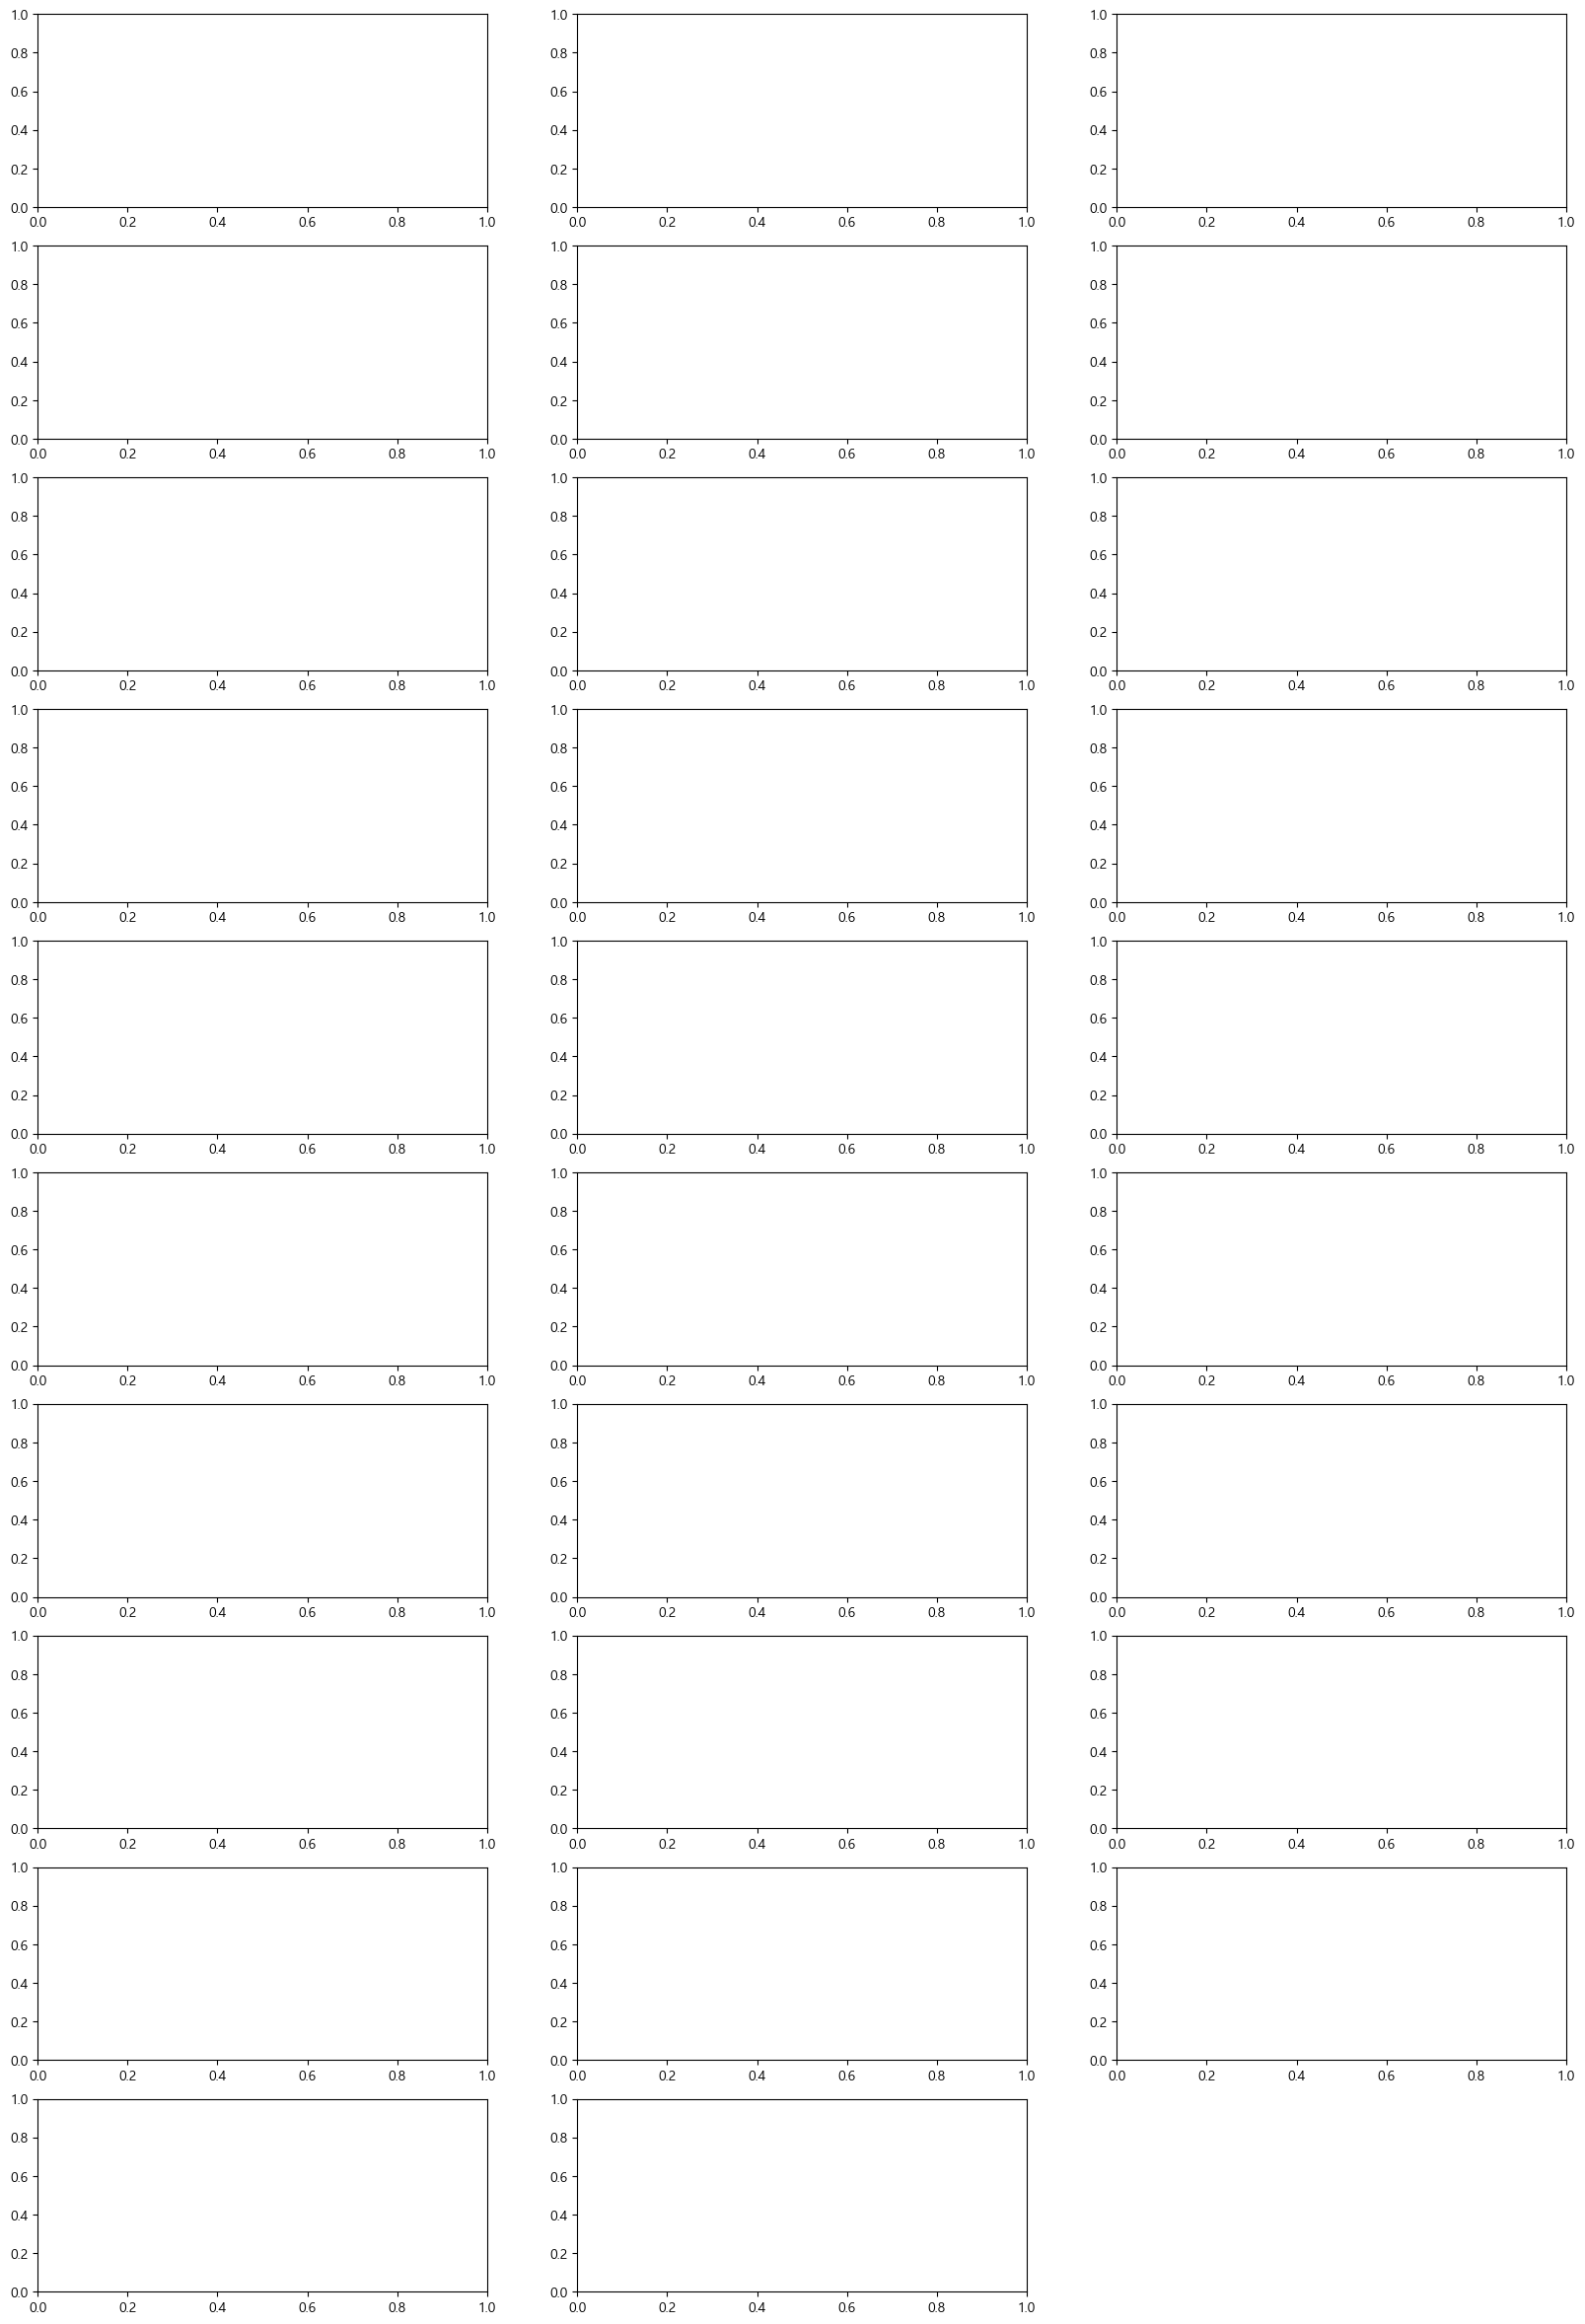

In [10]:
fig = plt.figure(figsize=(20,30))
axes1 = fig.add_subplot(10,3,1)
axes2 = fig.add_subplot(10,3,2)
axes3 = fig.add_subplot(10,3,3)
axes4 = fig.add_subplot(10,3,4)
axes5 = fig.add_subplot(10,3,5)
axes6 = fig.add_subplot(10,3,6)
axes7 = fig.add_subplot(10,3,7)
axes8 = fig.add_subplot(10,3,8)
axes9 = fig.add_subplot(10,3,9)
axes10 = fig.add_subplot(10,3,10)
axes11 = fig.add_subplot(10,3,11)
axes12 = fig.add_subplot(10,3,12)
axes13 = fig.add_subplot(10,3,13)
axes14 = fig.add_subplot(10,3,14)
axes15 = fig.add_subplot(10,3,15)
axes16 = fig.add_subplot(10,3,16)
axes17 = fig.add_subplot(10,3,17)
axes18 = fig.add_subplot(10,3,18)
axes19 = fig.add_subplot(10,3,19)
axes20 = fig.add_subplot(10,3,20)
axes21 = fig.add_subplot(10,3,21)
axes22 = fig.add_subplot(10,3,22)
axes23 = fig.add_subplot(10,3,23)
axes24 = fig.add_subplot(10,3,24)
axes25 = fig.add_subplot(10,3,25)
axes26 = fig.add_subplot(10,3,26)
axes27 = fig.add_subplot(10,3,27)
axes28 = fig.add_subplot(10,3,28)
axes29 = fig.add_subplot(10,3,29)
plt.show()

### ÌäπÏÑ±Î≥Ñ Ï†ïÍ∑úÎ∂ÑÌè¨ ÌôïÏù∏

((array([-3.91330934, -3.69373542, -3.57343686, ...,  3.57343686,
          3.69373542,  3.91330934]),
  array([-100., -100., -100., ...,  100.,  100.,  100.])),
 (22.360459259968408, 12.556642805542781, 0.7715409348060587))

c:\Users\jeong hee lee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\jeong hee lee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


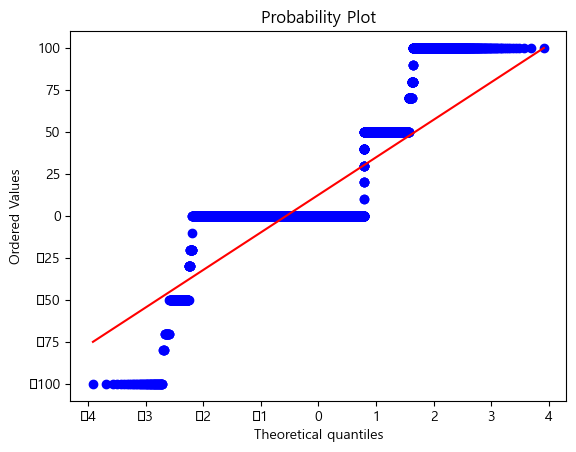

In [88]:
stats.probplot(df['beverage'], dist="norm", plot=plt)

In [132]:
# pÍ∞íÏù¥ 0.05Î≥¥Îã§ ÎÇÆÎã§ ‚Üí Í∑ÄÎ¨¥ Í∞ÄÏÑ§ Í∏∞Í∞Å(=Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÎã§.)
shapiro_test = stats.shapiro(df_ver3['slope'])
print(shapiro_test)
#print('Statistics=%.3f, p=%.3f' % (stat, p))

ShapiroResult(statistic=0.7328909031039205, pvalue=4.155739411490679e-93)


# Ï∂îÍ∞Ä Ï†ÑÏ≤òÎ¶¨

### 1. Ïª¨Îüº 1Ï†êÍ∞í Î≥ÄÍ≤Ω

In [7]:
# health Ïª¨Îüº 1Ï†êÏùÑ 10Ï†êÏúºÎ°ú Î≥ÄÍ≤Ω
df.loc[df['ID']=='W0407', 'health'] = 10
df.loc[df['ID']=='sooberior', 'health'] = 10

In [24]:
columns = df.columns

results = []

for i in columns:
    num = len(df[df[i]==1])
    answer = f'{i}Ïùò 1 Í∞úÏàòÎäî {num}ÏûÖÎãàÎã§.'
    results.append(answer)

In [25]:
for result in results:
    print(result)

PlatformÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
NumberÏùò 1 Í∞úÏàòÎäî 87ÏûÖÎãàÎã§.
StoreÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
AddressÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
AddrÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
Review_scoreÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
Review_countsÏùò 1 Í∞úÏàòÎäî 8ÏûÖÎãàÎã§.
IDÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
DateÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
Review_textÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
TimeÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
slopeÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
breadÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
beverageÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
veganÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
no_seniorÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
no_kidsÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
petÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
whole_wheatÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
viewÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
atmosphereÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
friendlyÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
clean_storeÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
restroom_cleanÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
parkingÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
spacious_storeÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
plenty_seatsÏùò 1 Í∞úÏàòÎäî 0ÏûÖÎãàÎã§.
comfortable_seatsÏùò 1 Í∞úÏàòÎäî 0

In [23]:
df['beautiful_interior'] = df['beautiful_interior'].replace(1, 0)

In [18]:
df.loc[df['ID'] == 'Î∞©Î¨∏ÌñàÏñ¥Ïöî', 'special_menu'] = 1
df.loc[df['ID'] == 'Ïö∞Ìú¥68', 'special_menu'] = 1
df.loc[df['ID'] == 'Ïñç958', 'special_menu'] = 100

### 2. Ïù¥ÏÉÅÏπò Ï†úÍ±∞

In [27]:
df[df['bread']==450]

Platform  Number Store                       Address   Addr  \
2288    naver      37  Îñ°ÎπµÏïóÍ∞Ñ  ÏÑúÏö∏ Ï§ëÍµ¨ Ï≤≠Í≥ÑÏ≤úÎ°ú 318 Îã§Îèô, 1Ï∏µ 54,55Ìò∏  ÏÑúÏö∏ Ï§ëÍµ¨   

      Review_score  Review_counts      ID       Date  Review_text  \
2288          4.38            213  qa****  23.4.21.Í∏à  ÎßõÏûàÏóàÏñ¥Ïöî!!! „Öé„Öé   

                       Time    slope  bread  beverage  vegan  no_senior  \
2288  2024-04-08 - 00:46:27  1.68751  450.0       0.0    0.0          0   

      no_kids  pet  whole_wheat  view  atmosphere  friendly  clean_store  \
2288        0    0            0     0           0         0            0   

      restroom_clean  parking  spacious_store  plenty_seats  \
2288               0        0               0             0   

      comfortable_seats  special_menu  photo  good_music  \
2288                  0             0      0           0   

      reservation_possible  unique_concept  beautiful_interior  price  wait  \
2288                     0               0                   0      0     0   

      health  sentiment bread_name  
2288       0          1       None

In [28]:
df.loc[(df['Review_text']=='ÎßõÏûàÏóàÏñ¥Ïöî!!! „Öé„Öé') & (df['Store']=='Îñ°ÎπµÏïóÍ∞Ñ'), 'bread'] = 50

In [29]:
df[df['Review_text']=='ÎßõÏûàÏóàÏñ¥Ïöî!!! „Öé„Öé']

Platform  Number Store                       Address   Addr  \
2288    naver      37  Îñ°ÎπµÏïóÍ∞Ñ  ÏÑúÏö∏ Ï§ëÍµ¨ Ï≤≠Í≥ÑÏ≤úÎ°ú 318 Îã§Îèô, 1Ï∏µ 54,55Ìò∏  ÏÑúÏö∏ Ï§ëÍµ¨   

      Review_score  Review_counts      ID       Date  Review_text  \
2288          4.38            213  qa****  23.4.21.Í∏à  ÎßõÏûàÏóàÏñ¥Ïöî!!! „Öé„Öé   

                       Time    slope  bread  beverage  vegan  no_senior  \
2288  2024-04-08 - 00:46:27  1.68751   50.0       0.0    0.0          0   

      no_kids  pet  whole_wheat  view  atmosphere  friendly  clean_store  \
2288        0    0            0     0           0         0            0   

      restroom_clean  parking  spacious_store  plenty_seats  \
2288               0        0               0             0   

      comfortable_seats  special_menu  photo  good_music  \
2288                  0             0      0           0   

      reservation_possible  unique_concept  beautiful_interior  price  wait  \
2288                     0               0                   0      0     0   

      health  sentiment bread_name  
2288       0          1       None

### 3. nullÍ∞í Ï±ÑÏö∞Í∏∞

In [30]:
df[df['ID']=='Î≠êÎûò76']

Platform  Number  Store                 Address   Addr  Review_score  \
10832    naver     166  Ïπ¥ÌéòÌîºÌÅ¨Îãâ  ÏÑúÏö∏ Ï§ëÍµ¨ Ìá¥Í≥ÑÎ°ú6Í∞ÄÍ∏∏ 30 1Ï∏µ ÌîºÌÅ¨Îãâ  ÏÑúÏö∏ Ï§ëÍµ¨           4.4   

       Review_counts    ID      Date                        Review_text  \
10832           1043  Î≠êÎûò76  23.1.4.Ïàò  Î∂ÑÏúÑÍ∏∞ Ï¢ãÍ≥† ÏùåÎ£åÎèÑ ÎßõÏûàÏñ¥Ïöî : ) ÏßëÏ§ëÌïòÍ∏∞ Ï¢ãÏùÄÍ≤ÉÍ∞ôÏïÑÏöî üëç   

                        Time    slope  bread  beverage  vegan  no_senior  \
10832  2024-04-08 - 00:15:34  4.97441    0.0      50.0    NaN          0   

       no_kids  pet  whole_wheat  view  atmosphere  friendly  clean_store  \
10832        0    0            0     0         100         0            0   

       restroom_clean  parking  spacious_store  plenty_seats  \
10832               0        0               0             0   

       comfortable_seats  special_menu  photo  good_music  \
10832                  0             0      0           0   

       reservation_possible  unique_concept  beautiful_interior  price  wait  \
10832                     0               0                   0      0     0   

       health  sentiment bread_name  
10832       0          1       None

In [31]:
df.loc[df['ID']=='Ìù¨Ï†ï', 'bread'] = 0
df.loc[df['ID']=='Î≠êÎûò76', 'bread'] = 0

In [32]:
df[df['vegan'].isna()==True]

Platform  Number  Store                 Address   Addr  Review_score  \
10832    naver     166  Ïπ¥ÌéòÌîºÌÅ¨Îãâ  ÏÑúÏö∏ Ï§ëÍµ¨ Ìá¥Í≥ÑÎ°ú6Í∞ÄÍ∏∏ 30 1Ï∏µ ÌîºÌÅ¨Îãâ  ÏÑúÏö∏ Ï§ëÍµ¨           4.4   

       Review_counts    ID      Date                        Review_text  \
10832           1043  Î≠êÎûò76  23.1.4.Ïàò  Î∂ÑÏúÑÍ∏∞ Ï¢ãÍ≥† ÏùåÎ£åÎèÑ ÎßõÏûàÏñ¥Ïöî : ) ÏßëÏ§ëÌïòÍ∏∞ Ï¢ãÏùÄÍ≤ÉÍ∞ôÏïÑÏöî üëç   

                        Time    slope  bread  beverage  vegan  no_senior  \
10832  2024-04-08 - 00:15:34  4.97441    0.0      50.0    NaN          0   

       no_kids  pet  whole_wheat  view  atmosphere  friendly  clean_store  \
10832        0    0            0     0         100         0            0   

       restroom_clean  parking  spacious_store  plenty_seats  \
10832               0        0               0             0   

       comfortable_seats  special_menu  photo  good_music  \
10832                  0             0      0           0   

       reservation_possible  unique_concept  beautiful_interior  price  wait  \
10832                     0               0                   0      0     0   

       health  sentiment bread_name  
10832       0          1       None

In [35]:
df['beverage'] = df['beverage'].fillna(0)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15227 entries, 0 to 15226
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Platform              15227 non-null  object 
 1   Number                15227 non-null  int64  
 2   Store                 15227 non-null  object 
 3   Address               15227 non-null  object 
 4   Addr                  15227 non-null  object 
 5   Review_score          15227 non-null  float64
 6   Review_counts         15227 non-null  int64  
 7   ID                    15227 non-null  object 
 8   Date                  15227 non-null  object 
 9   Review_text           15227 non-null  object 
 10  Time                  15227 non-null  object 
 11  slope                 15227 non-null  float64
 12  bread                 15227 non-null  float64
 13  beverage              15227 non-null  float64
 14  vegan                 15227 non-null  float64
 15  no_senior          

In [38]:
# Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÌïú Îç∞Ïù¥ÌÑ∞ÏÖã
df.to_csv('real_fin_dataset(ver.3)(24.04.18).csv', encoding = 'utf-8-sig')

# ÌëúÏ§ÄÌôî

In [ ]:
df_bread_info = df[['Platform', 'Number', 'Store', 'Address', 'Addr', 'ID', 'Date', 'Review_text', 'Time']]
df_bread_anal = df.drop(['Platform', 'Number', 'Store', 'Address', 'Addr', 'ID', 'Date', 'Review_text', 'Time', 'bread_name'], axis=1)

In [7]:
df_bread_anal

Review_score  Review_counts    slope  bread  beverage  vegan  \
0               4.3            334  0.00000    0.0       0.0    0.0   
1               4.3            334  0.00000   10.0     100.0    0.0   
2               4.3            334  0.00000    0.0     -50.0    0.0   
3               4.3            334  0.00000    0.0       0.0    0.0   
4               4.3            334  0.00000   10.0       0.0    0.0   
...             ...            ...      ...    ...       ...    ...   
15222           4.4             39  2.36245   50.0       0.0    0.0   
15223           4.4             39  2.36245  100.0     100.0    0.0   
15224           4.4             39  2.36245   50.0       0.0    0.0   
15225           4.4             39  2.36245   50.0       0.0    0.0   
15226           4.4             39  2.36245    0.0       0.0    0.0   

       no_senior  no_kids  pet  whole_wheat  view  atmosphere  friendly  \
0              0        0    0            0     0           0         0   
1              0        0    0            0     0           0         0   
2              0        0    0            0     0           0         0   
3              0        0    0            0     0           0         0   
4              0        0    0            0     0           0         0   
...          ...      ...  ...          ...   ...         ...       ...   
15222          0        0    0            0     0           0         0   
15223          0        0    0            0     0           0         0   
15224          0        0    0            0     0           0        50   
15225          0        0    0            0     0           0         0   
15226          0        0    0            0     0           0        50   

       clean_store  restroom_clean  parking  spacious_store  plenty_seats  \
0                0               0        0               0             0   
1                0               0        0               0             0   
2                0               0        0               0             0   
3                0               0        0               0             0   
4              100               0        0               0             0   
...            ...             ...      ...             ...           ...   
15222            0               0        0               0             0   
15223            0               0        0               0             0   
15224            0               0        0               0             0   
15225            0               0        0               0             0   
15226            0               0        0               0             0   

       comfortable_seats  special_menu  photo  good_music  \
0                      0             0      0           0   
1                      0             0      0           0   
2                      0             0      0           0   
3                      0             0      0           0   
4                      0             0      0           0   
...                  ...           ...    ...         ...   
15222                  0             0      0           0   
15223                  0             0      0           0   
15224                  0             0      0           0   
15225                  0             0      0           0   
15226                  0             0      0           0   

       reservation_possible  unique_concept  beautiful_interior  price  wait  \
0                         0               0                   0      0     0   
1                         0               0                   0      0     0   
2                         0               0                   0      0     0   
3                         0               0                   0      0     0   
4                         0               0                 100    100     0   
...                     ...             ...                 ...    ...   ...   
15222                     0        

In [24]:
# Îç∞Ïù¥ÌÑ∞ÏÖã Î≥µÏÇ¨
df_anal_ss = df_anal.copy() # for ver.4
df_anal_ss = df_anal.copy() # for ver.5

In [145]:
ss = StandardScaler()

#### ver.4 ÏûëÏóÖ

In [27]:
# Ïä§ÏºÄÏùºÎßÅ
df_bread_anal_ss['Review_score_ss'] = ss.fit_transform(df_bread_anal[['Review_score']])
df_bread_anal_ss['Review_counts_ss'] = ss.fit_transform(df_bread_anal[['Review_counts']])
df_bread_anal_ss['slope_ss'] = ss.fit_transform(df_bread_anal[['slope']])

# Í∏∞Ï°¥ Ïª¨Îüº ÏÇ≠Ï†ú Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
df_bread_anal_ss = df_bread_anal_ss[['Review_score_ss', 'Review_counts_ss', 'slope_ss', 'Review_score', 'Review_counts', 'slope', 'bread', 'beverage', 'vegan', 'no_senior', 'no_kids', 'pet', 'whole_wheat', 'view', 'atmosphere', 'friendly', 'clean_store', 'restroom_clean', 'parking', 'spacious_store', 'plenty_seats', 'comfortable_seats', 'special_menu', 'photo', 'good_music', 'reservation_possible', 'unique_concept', 'beautiful_interior', 'price', 'wait', 'health', 'sentiment']]
df_bread_anal_ss = df_bread_anal_ss.drop(['Review_score', 'Review_counts', 'slope'], axis=1)
df_bread_anal_ss.rename(columns = {'Review_score_ss' : 'Review_score', 'Review_counts_ss' : 'Review_counts', 'slope_ss' : 'slope'}, inplace=True)

# Ïª¨Îüº Ï∂îÏ∂ú
df_bread_anal_ss.to_csv('real_fin_dataset(ver.4)(24.04.18).csv', encoding='utf-8-sig')

#### ver.5 ÏûëÏóÖ

In [ ]:
# sentiment Ïª¨ÎüºÍ∞í ÎπºÎëêÍ∏∞
sentiment = df_bread_anal_ss_2['sentiment']

# Ïä§ÏºÄÏùºÎßÅ
df_bread_anal_ss_2 = ss.fit_transform(df_bread_anal_ss_2)
df_bread_anal_ss_2 = pd.DataFrame(df_bread_anal_ss_2)

# Ïª¨Îüº Ïù¥Î¶Ñ Î∞îÍøîÏ£ºÍ∏∞
columns = df_bread_anal_ss.columns
df_bread_anal_ss_2.columns = columns

# sentiment Ïª¨Îüº ÏûëÏóÖ
df_bread_anal_ss_2['sentiment_ori'] = sentiment
df_bread_anal_ss_2.drop('sentiment', axis=1, inplace=True)
df_bread_anal_ss_2.rename(columns = {'sentiment_ori' : 'sentiment'}, inplace=True)

# Ï∂îÏ∂ú
df_bread_anal_ss_2.to_csv('real_fin_dataset(ver.5)(24.04.18).csv', encoding = 'utf-8-sig')

# Clustering

### Ï¢ãÏùÄ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥ºÏùò ÌåêÎã® Í∏∞Ï§Ä
1. ÏßÄÌëú(Ï¥àÍ∏∞Í∞í ÏÑ∏ÌåÖ ÊôÇ) / Ïã§Î£®Ïó£ Í≥ÑÏàò, elbow plot
2. Íµ∞Ïßë ÎÇ¥ Îç∞Ïù¥ÌÑ∞ Í∞ÑÏùò Ïù¥ÏßàÍ∞ê
3. Íµ∞ÏßëÏóê ÏÜçÌïòÎäî Îç∞Ïù¥ÌÑ∞Îì§Ïùò Í∞úÏàòÍ∞Ä ÎÑàÎ¨¥ Ìé∏Ìñ•ÎêòÏßÄÎäî ÏïäÎäîÏßÄ

In [94]:
df_anal.head(3)

Review_score  Review_counts     slope  bread  beverage  vegan  no_senior  \
0     -0.041896       -0.39635 -0.847594    0.0       0.0    0.0          0   
1     -0.041896       -0.39635 -0.847594   10.0     100.0    0.0          0   
2     -0.041896       -0.39635 -0.847594    0.0     -50.0    0.0          0   

   no_kids  pet  whole_wheat  view  atmosphere  friendly  clean_store  \
0        0    0            0     0           0         0            0   
1        0    0            0     0           0         0            0   
2        0    0            0     0           0         0            0   

   restroom_clean  parking  spacious_store  plenty_seats  comfortable_seats  \
0               0        0               0             0                  0   
1               0        0               0             0                  0   
2               0        0               0             0                  0   

   special_menu  photo  good_music  reservation_possible  unique_concept  \
0             0      0           0                     0               0   
1             0      0           0                     0               0   
2             0      0           0                     0               0   

   beautiful_interior  price  wait  health  sentiment  
0                   0      0     0       0          1  
1                   0      0     0       0          1  
2                   0      0     0       0          0

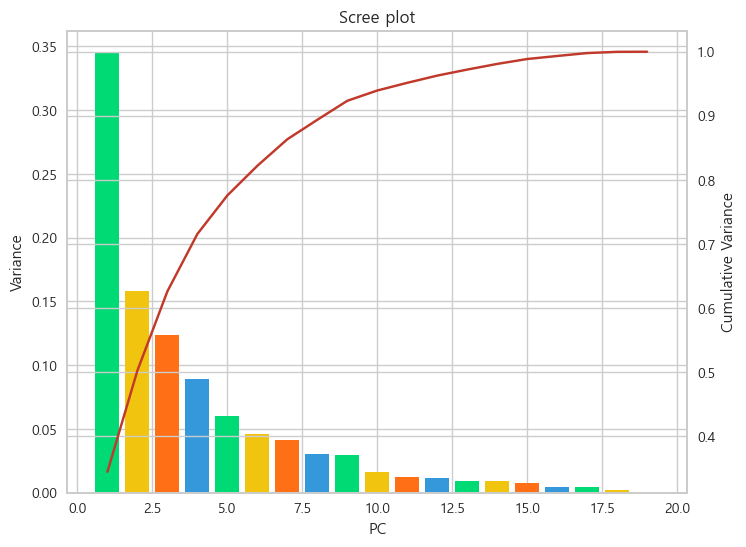

In [169]:
# Scree plot
n_feature = len(df_anal.columns)
pca_scree = PCA(n_components=n_feature)
pca_scree.fit(df_anal)
pc_arr = np.arange(pca_scree.n_components_)+1
vals = pca_scree.explained_variance_ratio_
cumvals = np.cumsum(vals)

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.bar(pc_arr, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db'])
ax1.set_xlabel("PC")
ax1.set_ylabel("Variance")

ax1.set_title("Scree plot")

ax2 = ax1.twinx()
ax2.plot(pc_arr, cumvals, color = '#c0392b')
ax2.set_ylabel("Cumulative Variance")

plt.show()

# varianceÎäî Í∞Å Ï£ºÏÑ±Î∂Ñ(Ï∞®Ïõê)Ïù¥ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÏÇ∞ÏùÑ ÏñºÎßàÎÇò Ïûò ÏÑ§Î™ÖÌïòÎäîÏßÄÎ•º ÎÇòÌÉÄÎÉÑ
# Ï£ºÏÑ±Î∂ÑÏùò Ï∂îÍ∞ÄÍ∞Ä Î∂ÑÏÇ∞ ÏÑ§Î™ÖÏóê ÌÅ∞ Í∏∞Ïó¨Î•º ÌïòÏßÄ ÏïäÍ≤å ÎêòÎäî 'elbow'ÏßÄÏ†êÍπåÏßÄÏùò Ï£ºÏÑ±Î∂ÑÎì§Îßå ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùå
# ÏïÑÎûò Í∑∏ÎûòÌîÑÏóêÏÑúÏùò Í≤ΩÏö∞ Ï≤´Î≤àÏß∏ Ï£ºÏÑ±Î∂ÑÏùÄ Ï†ÑÏ≤¥ Î∂ÑÏÇ∞Ïùò 34% Ï†ïÎèÑÎ•º ÏÑ§Î™ÖÌïòÍ≥† ÏûàÏùå
# Ï£ºÏÑ±Î∂ÑÎ≥Ñ varianceÎ•º Ìï©ÌñàÏùÑ Îïå 90% Ï†ïÎèÑÍ∞Ä ÎêòÎäî ÏßÄÏ†êÏù¥ ÏïûÏóêÏÑú Ïñ∏Í∏âÌïú 'elbow' ÏßÄÏ†êÏûÑ

### elbow plot

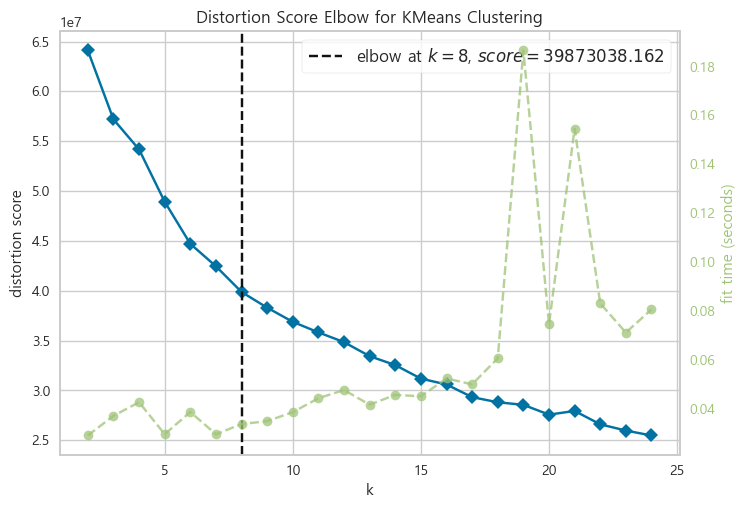

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=24, random_state=0), k=(2, 25))

In [78]:
# for Íµ∞Ïßë Í∞úÏàò ÌôïÏù∏
kelbow_visualizer(KMeans(random_state=0), df_anal, k=(2,25))

### Ïã§Î£®Ïó£ Í≥ÑÏàò

In [7]:
k_list = []
silhouette_list = []

for i in range(2, 20):
    kmeans=KMeans(n_clusters=i, random_state=0).fit(df_anal)
    silhouette_avg = silhouette_score(df_anal, kmeans.labels_)
    k_list.append(i)
    silhouette_list.append(silhouette_avg)
    print(f"k = {i} ‚Üí silhouette index {silhouette_avg}")

k = 2 ‚Üí silhouette index 0.34500336024071093
k = 3 ‚Üí silhouette index 0.3527550170548417
k = 4 ‚Üí silhouette index 0.2805815062636127
k = 5 ‚Üí silhouette index 0.31686029811782584
k = 6 ‚Üí silhouette index 0.35210444909392125
k = 7 ‚Üí silhouette index 0.3689375010014238
k = 8 ‚Üí silhouette index 0.3875398801827526
k = 9 ‚Üí silhouette index 0.39985808675513707
k = 10 ‚Üí silhouette index 0.41175531644050206
k = 11 ‚Üí silhouette index 0.4184475755292582
k = 12 ‚Üí silhouette index 0.4269548732744591
k = 13 ‚Üí silhouette index 0.4339800132285572
k = 14 ‚Üí silhouette index 0.44465455447243935
k = 15 ‚Üí silhouette index 0.45883163291361795
k = 16 ‚Üí silhouette index 0.4628453996130611
k = 17 ‚Üí silhouette index 0.47696385919601225
k = 18 ‚Üí silhouette index 0.4831756844494553
k = 19 ‚Üí silhouette index 0.48659100668965577


In [14]:
silhouette_dic = { k : silhouette for k, silhouette in zip(k_list, silhouette_list)}
silhouette_df = pd.DataFrame(silhouette_dic, index=[0])
silhouette_df

2         3         4        5         6         7        8   \
0  0.345003  0.352755  0.280582  0.31686  0.352104  0.368938  0.38754   

         9         10        11        12       13        14        15  \
0  0.399858  0.411755  0.418448  0.426955  0.43398  0.444655  0.458832   

         16        17        18        19  
0  0.462845  0.476964  0.483176  0.486591

In [23]:
silhouette_df = silhouette_df.transpose().reset_index().rename(columns={'index' : 'k', 0 : 'silhouette'})

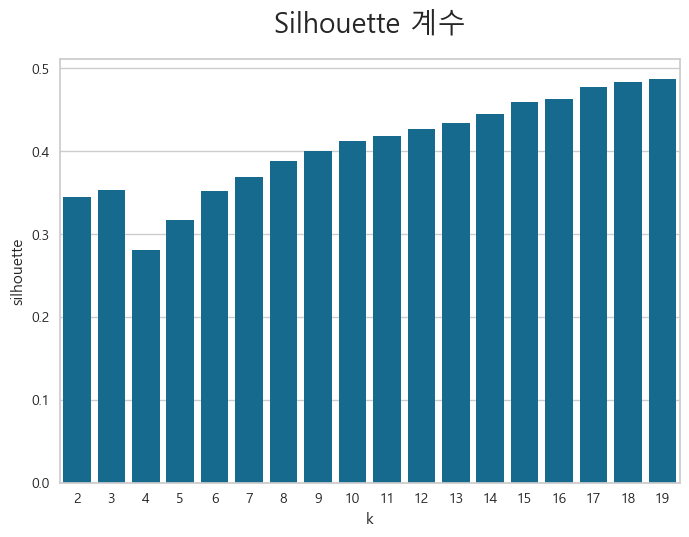

In [26]:
sns.barplot(data=silhouette_df, x='k', y='silhouette')
plt.title('Silhouette Í≥ÑÏàò', fontsize=20, pad=20)
plt.show()

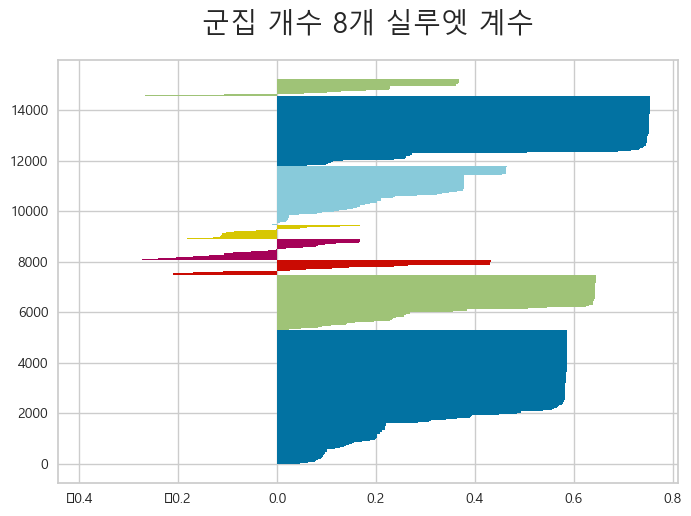

In [30]:
k = 8

fig, ax = plt.subplots(1,1)
kmeans = KMeans(n_clusters = k, random_state=0).fit(df_anal)
silhouette_vals = silhouette_samples(df_anal, kmeans.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    plt.title(f'Íµ∞Ïßë Í∞úÏàò {k}Í∞ú Ïã§Î£®Ïó£ Í≥ÑÏàò', fontsize=20, pad=20)
    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_lower += len(cluster_silhouette_vals)

### PCA

In [167]:
pca = PCA(n_components=8)
df_anal_pca = pd.DataFrame(data = pca.fit_transform(df_anal), columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])
# k-meansÎ°ú ÎÑòÏñ¥Í∞ÄÍ∏∞

In [43]:
# Ï∞®ÏõêÎ≥Ñ Î∂ÑÏÇ∞Î≥¥Ï°¥Ïú®
column = []
sum = 0

for a in range(2, 20):
   for b in range(a):
	   column.append(f'pc{b}')
   pca = PCA(n_components=a)
   df_anal_pca = pd.DataFrame(data = pca.fit_transform(df_anal), columns = column)
   column = []

   for c in range(len(pca.explained_variance_ratio_)):
      sum+=pca.explained_variance_ratio_[c]
   print(f'{a}Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ {sum}ÏûÖÎãàÎã§.')
   sum = 0

2Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.5029423754764534ÏûÖÎãàÎã§.
3Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.6264242267708784ÏûÖÎãàÎã§.
4Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.7158268506560757ÏûÖÎãàÎã§.
5Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.775927969202927ÏûÖÎãàÎã§.
6Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.8221131113359182ÏûÖÎãàÎã§.
7Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.8635041877715418ÏûÖÎãàÎã§.
8Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.8938414980090121ÏûÖÎãàÎã§.
9Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.9234708519704884ÏûÖÎãàÎã§.
10Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.9395178325765281ÏûÖÎãàÎã§.
11Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.951504696553558ÏûÖÎãàÎã§.
12Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.9627659100637509ÏûÖÎãàÎã§.
13Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.9721439706748989ÏûÖÎãàÎã§.
14Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.9809840292138603ÏûÖÎãàÎã§.
15Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.9886309554417166ÏûÖÎãàÎã§.
16Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.9933598497057292ÏûÖÎãàÎã§.
17Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.9978938706403783ÏûÖÎãàÎã§.
18Ï∞®ÏõêÏùò Î∂ÑÏÇ∞ Î≥¥Ï°¥Ïú®ÏùÄ 0.

In [20]:
# Î∂ÑÏÇ∞Î≥¥Ï°¥Ïú®
pca.explained_variance_ratio_

array([0.34506827, 0.15787411, 0.12348185, 0.08940262, 0.06010112,
       0.04618514, 0.04139108, 0.03033731])

In [102]:
# Î°úÎî©Í∞í(Í∞Å Ï£ºÏÑ±Î∂ÑÏóê ÎåÄÌïú Î≥ÄÏàòÎì§Ïùò Í∏∞Ïó¨ÎèÑÎ•º ÎÇòÌÉÄÎÉÑ)
# Ï£ºÏÑ±Î∂ÑÍ≥º featureÍ∞ÑÏùò Í¥ÄÍ≥Ñ ÌôïÏù∏
pca_com = pca.components_
pca_comdf = pd.DataFrame(pca_com, columns = df_anal.columns, index=[f'pc{idx+1}' for idx in range(pca_com.shape[0])])
pca_comdf

Review_score     bread  beverage      view  atmosphere  friendly  \
pc1     -0.003315 -0.984306 -0.022538  0.015489   -0.033591 -0.148179   
pc2     -0.004221  0.100693 -0.818385 -0.069671   -0.374022 -0.365414   
pc3      0.002547 -0.125014 -0.523498  0.033163    0.269731  0.785944   
pc4     -0.002094  0.042795 -0.218344  0.145807    0.816397 -0.451499   
pc5     -0.002000  0.037959  0.076905 -0.027951   -0.018336  0.092095   
pc6     -0.000126 -0.023403 -0.036588 -0.075831   -0.210900 -0.051347   
pc7      0.001323  0.000590 -0.016467 -0.042620   -0.178250  0.006625   
pc8     -0.001826  0.037342  0.010763  0.352075    0.018333  0.104243   
pc9      0.000987  0.006973 -0.014112  0.915920   -0.202396 -0.023486   

     clean_store  restroom_clean   parking  spacious_store  plenty_seats  \
pc1    -0.062172       -0.014984 -0.002772       -0.017489     -0.011443   
pc2    -0.128362       -0.038773 -0.005848       -0.067727     -0.043701   
pc3     0.117251        0.033975 -0.000486        0.030560      0.019856   
pc4     0.084108        0.023835  0.002961        0.091086      0.034922   
pc5    -0.039763       -0.003782 -0.009012       -0.012055     -0.005356   
pc6     0.281311        0.076151  0.033083        0.839049      0.304168   
pc7     0.081199        0.015298 -0.000327       -0.230450     -0.072376   
pc8    -0.841018       -0.197866  0.015971        0.286995      0.049566   
pc9     0.316776        0.093185  0.002529       -0.080297      0.002257   

     comfortable_seats  special_menu     photo  good_music  \
pc1          -0.005351     -0.001890 -0.003119    0.000384   
pc2          -0.037638     -0.003659 -0.021534   -0.014349   
pc3           0.024006      0.004082  0.011638    0.006229   
pc4           0.043110      0.004313  0.031769    0.020898   
pc5          -0.001589     -0.000153  0.000848    0.000049   
pc6           0.183438      0.004402  0.016312    0.003640   
pc7          -0.046497      0.009825  0.039855   -0.004088   
pc8           0.028703     -0.010021  0.014322    0.011158   
pc9           0.009583      0.004802  0.009651    0.009556   

     reservation_possible  beautiful_interior     price      wait  
pc1             -0.003708           -0.003303 -0.049773 -0.014809  
pc2             -0.001629           -0.093200 -0.079039 -0.016380  
pc3              0.008174            0.036557  0.016563  0.008794  
pc4             -0.009075            0.179052 -0.079011 -0.000011  
pc5             -0.000267            0.013187 -0.989900 -0.033352  
pc6              0.001800            0.167542 -0.024559  0.008473  
pc7              0.000578            0.946929  0.016800 -0.009964  
pc8              0.004303            0.167656  0.035655 -0.033681  
pc9             -0.001497           -0.044147 -0.038238  0.011162

In [103]:
# Ï∞®Ïõê Ï†ïÏ≤¥ÏÑ± ÌôïÏù∏ ÏûëÏóÖ
feature_pca = pca_comdf.transpose().sort_values('pc1', ascending=False)
feature_pca

pc1       pc2       pc3       pc4       pc5  \
view                  0.015489 -0.069671  0.033163  0.145807 -0.027951   
good_music            0.000384 -0.014349  0.006229  0.020898  0.000049   
special_menu         -0.001890 -0.003659  0.004082  0.004313 -0.000153   
parking              -0.002772 -0.005848 -0.000486  0.002961 -0.009012   
photo                -0.003119 -0.021534  0.011638  0.031769  0.000848   
beautiful_interior   -0.003303 -0.093200  0.036557  0.179052  0.013187   
Review_score         -0.003315 -0.004221  0.002547 -0.002094 -0.002000   
reservation_possible -0.003708 -0.001629  0.008174 -0.009075 -0.000267   
comfortable_seats    -0.005351 -0.037638  0.024006  0.043110 -0.001589   
plenty_seats         -0.011443 -0.043701  0.019856  0.034922 -0.005356   
wait                 -0.014809 -0.016380  0.008794 -0.000011 -0.033352   
restroom_clean       -0.014984 -0.038773  0.033975  0.023835 -0.003782   
spacious_store       -0.017489 -0.067727  0.030560  0.091086 -0.012055   
beverage             -0.022538 -0.818385 -0.523498 -0.218344  0.076905   
atmosphere           -0.033591 -0.374022  0.269731  0.816397 -0.018336   
price                -0.049773 -0.079039  0.016563 -0.079011 -0.989900   
clean_store          -0.062172 -0.128362  0.117251  0.084108 -0.039763   
friendly             -0.148179 -0.365414  0.785944 -0.451499  0.092095   
bread                -0.984306  0.100693 -0.125014  0.042795  0.037959   

                           pc6       pc7       pc8       pc9  
view                 -0.075831 -0.042620  0.352075  0.915920  
good_music            0.003640 -0.004088  0.011158  0.009556  
special_menu          0.004402  0.009825 -0.010021  0.004802  
parking               0.033083 -0.000327  0.015971  0.002529  
photo                 0.016312  0.039855  0.014322  0.009651  
beautiful_interior    0.167542  0.946929  0.167656 -0.044147  
Review_score         -0.000126  0.001323 -0.001826  0.000987  
reservation_possible  0.001800  0.000578  0.004303 -0.001497  
comfortable_seats     0.183438 -0.046497  0.028703  0.009583  
plenty_seats          0.304168 -0.072376  0.049566  0.002257  
wait                  0.008473 -0.009964 -0.033681  0.011162  
restroom_clean        0.076151  0.015298 -0.197866  0.093185  
spacious_store        0.839049 -0.230450  0.286995 -0.080297  
beverage             -0.036588 -0.016467  0.010763 -0.014112  
atmosphere           -0.210900 -0.178250  0.018333 -0.202396  
price                -0.024559  0.016800  0.035655 -0.038238  
clean_store           0.281311  0.081199 -0.841018  0.316776  
friendly             -0.051347  0.006625  0.104243 -0.023486  
bread                -0.023403  0.000590  0.037342  0.006973

In [104]:
feature_pca.reset_index(inplace=True)
feature_pca.rename(columns={'index' : 'feature'}, inplace=True)
feature_pca

feature       pc1       pc2       pc3       pc4       pc5  \
0                   view  0.015489 -0.069671  0.033163  0.145807 -0.027951   
1             good_music  0.000384 -0.014349  0.006229  0.020898  0.000049   
2           special_menu -0.001890 -0.003659  0.004082  0.004313 -0.000153   
3                parking -0.002772 -0.005848 -0.000486  0.002961 -0.009012   
4                  photo -0.003119 -0.021534  0.011638  0.031769  0.000848   
5     beautiful_interior -0.003303 -0.093200  0.036557  0.179052  0.013187   
6           Review_score -0.003315 -0.004221  0.002547 -0.002094 -0.002000   
7   reservation_possible -0.003708 -0.001629  0.008174 -0.009075 -0.000267   
8      comfortable_seats -0.005351 -0.037638  0.024006  0.043110 -0.001589   
9           plenty_seats -0.011443 -0.043701  0.019856  0.034922 -0.005356   
10                  wait -0.014809 -0.016380  0.008794 -0.000011 -0.033352   
11        restroom_clean -0.014984 -0.038773  0.033975  0.023835 -0.003782   
12        spacious_store -0.017489 -0.067727  0.030560  0.091086 -0.012055   
13              beverage -0.022538 -0.818385 -0.523498 -0.218344  0.076905   
14            atmosphere -0.033591 -0.374022  0.269731  0.816397 -0.018336   
15                 price -0.049773 -0.079039  0.016563 -0.079011 -0.989900   
16           clean_store -0.062172 -0.128362  0.117251  0.084108 -0.039763   
17              friendly -0.148179 -0.365414  0.785944 -0.451499  0.092095   
18                 bread -0.984306  0.100693 -0.125014  0.042795  0.037959   

         pc6       pc7       pc8       pc9  
0  -0.075831 -0.042620  0.352075  0.915920  
1   0.003640 -0.004088  0.011158  0.009556  
2   0.004402  0.009825 -0.010021  0.004802  
3   0.033083 -0.000327  0.015971  0.002529  
4   0.016312  0.039855  0.014322  0.009651  
5   0.167542  0.946929  0.167656 -0.044147  
6  -0.000126  0.001323 -0.001826  0.000987  
7   0.001800  0.000578  0.004303 -0.001497  
8   0.183438 -0.046497  0.028703  0.009583  
9   0.304168 -0.072376  0.049566  0.002257  
10  0.008473 -0.009964 -0.033681  0.011162  
11  0.076151  0.015298 -0.197866  0.093185  
12  0.839049 -0.230450  0.286995 -0.080297  
13 -0.036588 -0.016467  0.010763 -0.014112  
14 -0.210900 -0.178250  0.018333 -0.202396  
15 -0.024559  0.016800  0.035655 -0.038238  
16  0.281311  0.081199 -0.841018  0.316776  
17 -0.051347  0.006625  0.104243 -0.023486  
18 -0.023403  0.000590  0.037342  0.006973

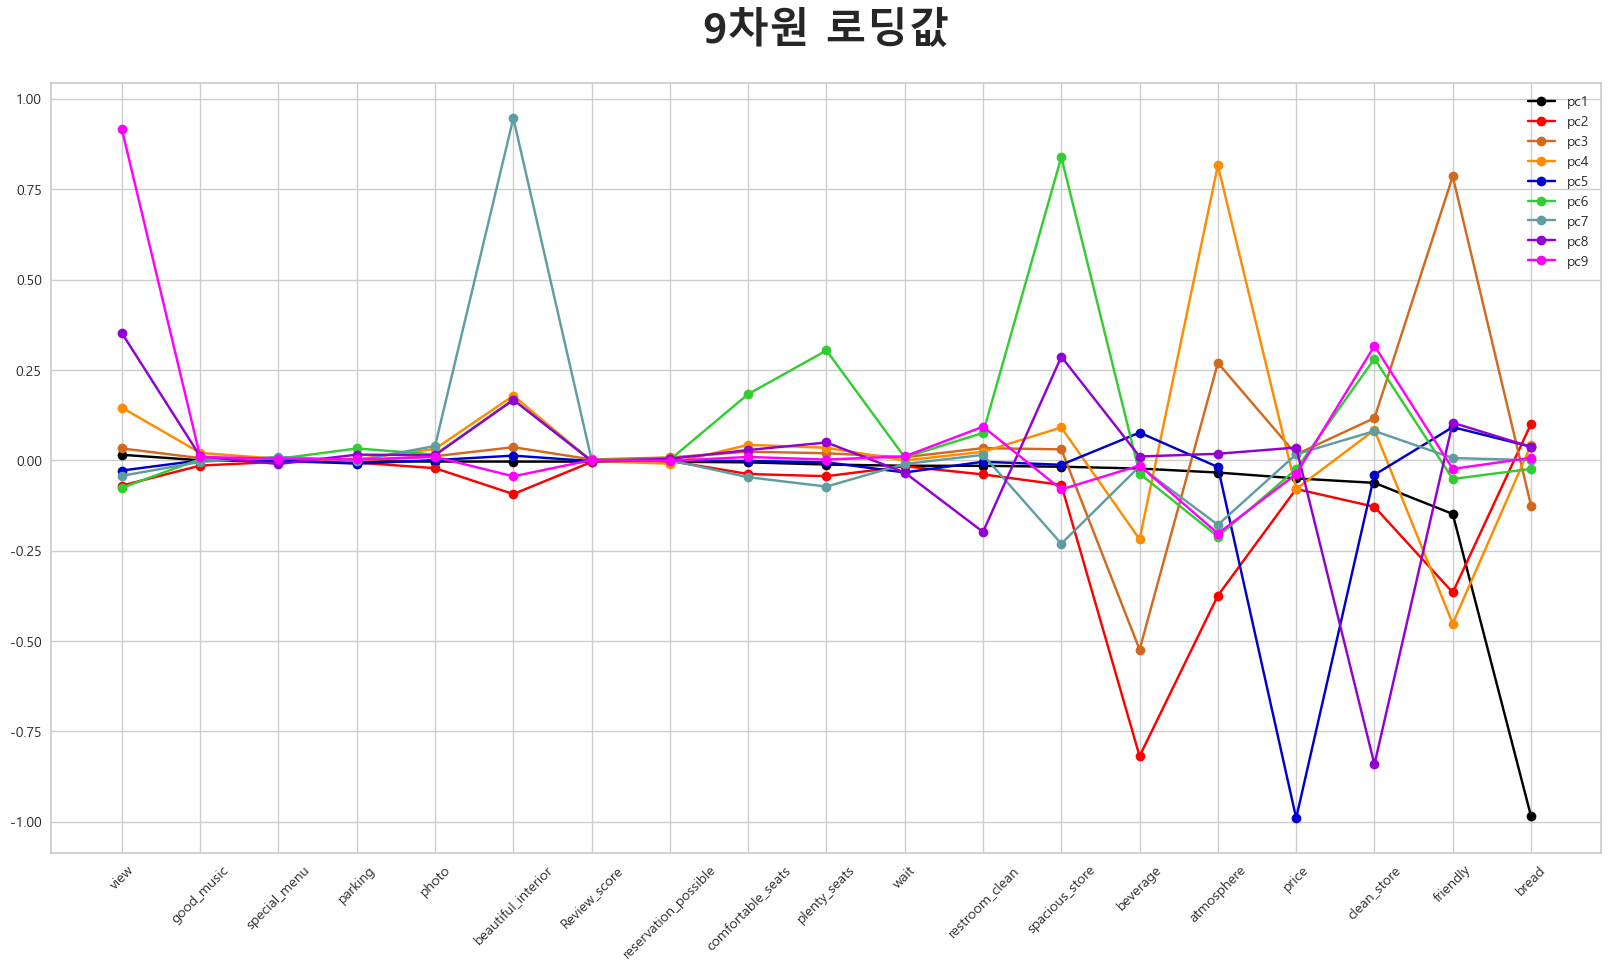

In [111]:
plt.figure(figsize=(20,10))
plt.plot(feature_pca['feature'], feature_pca['pc1'], marker = 'o', label='pc1', color = 'black')
plt.plot(feature_pca['feature'], feature_pca['pc2'], marker = 'o', label='pc2', color = 'red')
plt.plot(feature_pca['feature'], feature_pca['pc3'], marker = 'o', label='pc3', color = 'chocolate')
plt.plot(feature_pca['feature'], feature_pca['pc4'], marker = 'o', label='pc4', color = 'darkorange')
plt.plot(feature_pca['feature'], feature_pca['pc5'], marker = 'o', label='pc5', color = 'mediumblue')
plt.plot(feature_pca['feature'], feature_pca['pc6'], marker = 'o', label='pc6', color = 'limegreen')
plt.plot(feature_pca['feature'], feature_pca['pc7'], marker = 'o', label='pc7', color = 'cadetblue')
plt.plot(feature_pca['feature'], feature_pca['pc8'], marker = 'o', label='pc8', color = 'darkviolet')
plt.plot(feature_pca['feature'], feature_pca['pc9'], marker = 'o', label='pc9', color = 'fuchsia')

plt.title(f'{len(pca_com)}Ï∞®Ïõê Î°úÎî©Í∞í', fontsize=30, fontweight='bold', pad=30)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### K-Means

In [218]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(df_anal_pca)

In [219]:
# for radar plot
df_centroids = pd.DataFrame(kmeans.cluster_centers_, columns = df_anal_pca.columns)
df_centroids

pc1        pc2        pc3        pc4        pc5        pc6  \
0  36.962422   4.699191   2.065629  -3.506431   1.545754   0.651198   
1 -64.783261  17.076618  -1.239020  -2.460916   2.357184  -0.962584   
2 -16.421259 -50.785405 -37.557764 -18.946829   4.724299   0.115767   
3 -12.219053 -52.185187  28.981406  59.631999   0.105596  -7.246486   
4   2.173581  -1.098468   3.693213 -11.717944 -69.333298  -1.571137   
5  15.755130 -16.336411   3.245509  16.966344   1.441733  11.083684   
6 -15.554604  15.579400   2.641443  -1.626642   2.824196  -0.408066   

         pc7       pc8  
0  -2.231375 -1.272883  
1  -1.255936  1.101737  
2  -2.171388  0.417602  
3 -10.333303  1.430331  
4  -0.004506  1.306455  
5  59.309536  9.256201  
6  -1.506486 -1.120900

In [148]:
# for Íµ∞Ïßë Ï†ïÏ≤¥ÏÑ± ÌååÏïÖ 1
df_centroids = df_centroids.transpose()
df_centroids.reset_index(inplace=True)
df_centroids.rename(columns={'index' : 'pc'}, inplace=True)
df_centroids

pc          0          1          2          3          4          5  \
0  pc1  38.033674 -63.477205 -62.992657  23.413846 -15.049357  20.652197   
1  pc2  13.544486  21.724963 -52.342265 -38.001845  16.981667 -28.584922   
2  pc3   4.420611  -7.285678 -44.276228 -23.075697  -1.940318  13.804955   
3  pc4  -0.521364   2.021066 -16.929291 -12.226088   0.776649  39.083381   
4  pc5  -0.970396  -0.131722   5.978830   0.910512  -0.607574  -4.282576   
5  pc6   1.763956  -0.336927   3.016374  -0.604063   0.125899 -10.581494   
6  pc7   0.576755  -0.008063   0.717898   0.669580  -0.380458  -7.146382   
7  pc8  -1.494000   0.708891   1.968847  -0.902969  -1.301228  30.376180   
8  pc9  -1.048151   0.283913   0.048076  -1.541440  -0.306986  70.465038   

           6          7  
0 -15.484511 -36.358649  
1 -51.908401 -18.846881  
2  30.514822  64.857496  
3  61.395397 -40.343347  
4   0.141661   4.784620  
5  -4.896230  -3.813835  
6  -3.771389   1.050196  
7  -3.044171   5.146441  
8 -14.209874  -1.204788

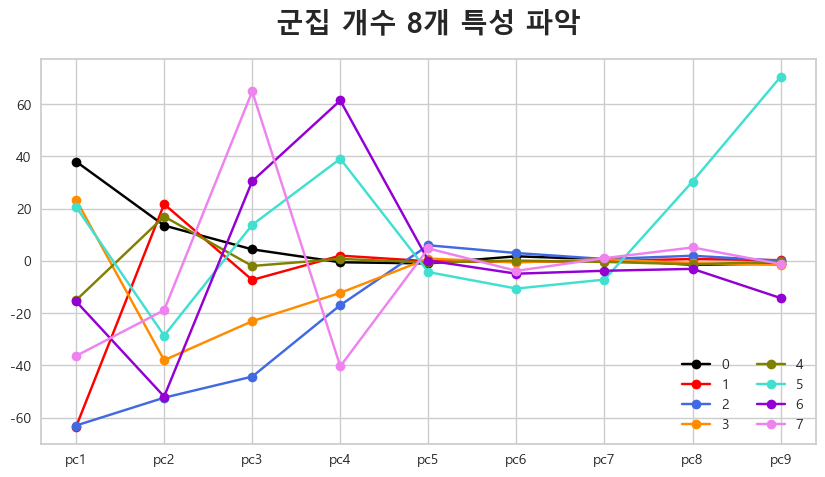

In [159]:
# for Íµ∞Ïßë Ï†ïÏ≤¥ÏÑ± ÌååÏïÖ 2
plt.figure(figsize=(10,5))

plt.plot(df_centroids['pc'], df_centroids[0], marker = 'o', label='0', color = 'black')
plt.plot(df_centroids['pc'], df_centroids[1], marker = 'o', label='1', color = 'red')
plt.plot(df_centroids['pc'], df_centroids[2], marker = 'o', label='2', color = 'royalblue')
plt.plot(df_centroids['pc'], df_centroids[3], marker = 'o', label='3', color = 'darkorange')
plt.plot(df_centroids['pc'], df_centroids[4], marker = 'o', label='4', color = 'olive')
plt.plot(df_centroids['pc'], df_centroids[5], marker = 'o', label='5', color = 'turquoise')
plt.plot(df_centroids['pc'], df_centroids[6], marker = 'o', label='6', color = 'darkviolet')
plt.plot(df_centroids['pc'], df_centroids[7], marker = 'o', label='7', color = 'violet')


plt.title(f'Íµ∞Ïßë Í∞úÏàò {len(kmeans.cluster_centers_)}Í∞ú ÌäπÏÑ± ÌååÏïÖ', fontsize=20, fontweight='bold', pad=20)
plt.legend(ncols=2, loc='lower right')
plt.show()

### Scatter plot

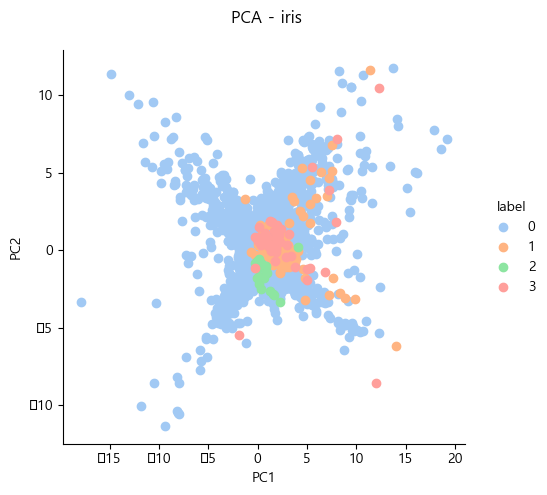

In [23]:
# PCA ÏãúÍ∞ÅÌôî with Seaborn
g = sns.FacetGrid(df_anal_pca, hue="label", height = 5, margin_titles = True, # margin_titleÏùÄ Ï†úÎ™© ÌëúÏãúÏó¨Î∂ÄÎ•º Ï†ÅÎäî Í≥≥
                 palette = sns.color_palette("pastel", 4))
g.map_dataframe(plt.scatter, "pc1", "pc2")
g.add_legend() # hueÏùò Í≤∞Í≥ºÎ•º Ï∞çÍ∏∞ÏúÑÌï¥
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("PCA - iris")
g.set_xlabels("PC1")
g.set_ylabels("PC2")

### T-SNE

In [12]:
tsne = TSNE(n_components=2) # Ï∞®ÏõêÏùò Í∞úÏàò

df_anal_tsne = pd.DataFrame(data = tsne.fit_transform(df_anal), columns = ['col1', 'col2'])
df_anal_tsne['label']=kmeans.labels_

In [ ]:
#t-sne ÏãúÍ∞ÅÌôî
g = sns.FacetGrid(df_anal_tsne, hue="label", height = 8, margin_titles = True,
                  palette = sns.color_palette())
g.map_dataframe(plt.scatter, "col1", "col2")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("t-sne - digits")
g.set_xlabels("X")
g.set_ylabels("Y")

### Radar plot

In [ ]:
size_df = pd.DataFrame({'index' : [0,1,2,3,4,5,6,7]})

In [182]:
size_df['8pc_6k'] = df_centroids['size']
size_df

index  9pc_6k  9pc_7k  9pc_8k  8pc_8k  8pc_7k  8pc_6k
0      0  7040.0  6482.0    5788    5550  6881.0  6999.0
1      1  2909.0  2909.0    2802    2798  3097.0  3243.0
2      2  2189.0  2182.0     511     961  1211.0  3036.0
3      3  1091.0  1091.0    2249     825   898.0   899.0
4      4   696.0   694.0    2091     669   441.0   457.0
5      5  1302.0  1301.0     303    2186   579.0   593.0
6      6     NaN   568.0     785    1890  2120.0     NaN
7      7     NaN     NaN     698     348     NaN     NaN

In [183]:
size_df = size_df[['8pc_6k', '8pc_7k', '8pc_8k', '9pc_6k', '9pc_7k', '9pc_8k']]

In [220]:
size_df_transpose

0       1       2       3       4       5       6      7
8pc_6k  6999.0  3243.0  3036.0   899.0   457.0   593.0     NaN    NaN
8pc_7k  6881.0  3097.0  1211.0   898.0   441.0   579.0  2120.0    NaN
8pc_8k  5550.0  2798.0   961.0   825.0   669.0  2186.0  1890.0  348.0
9pc_6k  7040.0  2909.0  2189.0  1091.0   696.0  1302.0     NaN    NaN
9pc_7k  6482.0  2909.0  2182.0  1091.0   694.0  1301.0   568.0    NaN
9pc_8k  5788.0  2802.0   511.0  2249.0  2091.0   303.0   785.0  698.0

In [252]:
size_df_transpose.iloc[5,0:8]

0    5788.0
1    2802.0
2     511.0
3    2249.0
4    2091.0
5     303.0
6     785.0
7     698.0
Name: 9pc_8k, dtype: float64

In [202]:
size_df_transpose = size_df.transpose()

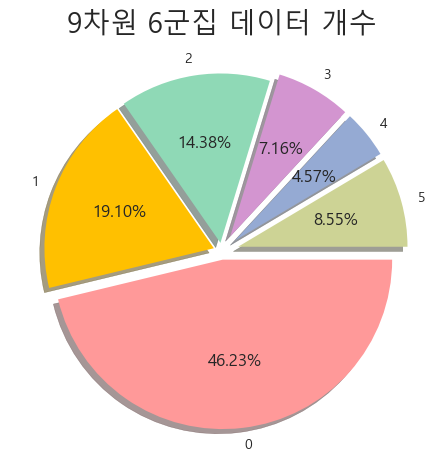

In [261]:
labels = [0,1,2,3,4,5]
explode = [0.05, 0.05, 0.05, 0.1, 0.1, 0.1]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#95aad3', '#cdd395']
#d3ac95
#95d3c9
plt.title("9Ï∞®Ïõê 6Íµ∞Ïßë Îç∞Ïù¥ÌÑ∞ Í∞úÏàò", fontsize=20)
plt.pie(size_df_transpose.iloc[3,0:6], labels=labels, autopct='%.2f%%', counterclock=False, shadow=True, explode=explode, colors=colors)
plt.show()

In [180]:
from collections import Counter

c = Counter()
c.update(kmeans.labels_) # kmeans.labels_Ïóê ÏûàÎäî Î†àÏù¥Î∏îÏùò Îì±Ïû• ÌöüÏàòÎ•º cÏóê Ï∂îÍ∞ÄÌï®(ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉú)
c

Counter({0: 6999, 1: 3243, 2: 3036, 3: 899, 5: 593, 4: 457})

In [181]:
label_counts = [c[x] for x in df_centroids.index]
df_centroids['size'] = label_counts
df_centroids

pc1        pc2        pc3        pc4        pc5        pc6  \
0  36.563654   4.691213   1.936795  -3.519362   1.566477   0.635201   
1 -63.297875  17.411412  -1.094842  -2.162261   2.619192  -0.796499   
2 -15.804467  -9.958762 -12.792673  -8.562420   3.648580  -0.535836   
3 -11.776850 -52.105919  29.401536  59.439676  -0.091606  -6.783869   
4   0.608320  -3.010150   3.262031 -12.551196 -69.099135  -1.885690   
5  12.913566 -18.288952   1.535871  16.761158   1.898412  11.339847   

         pc7       pc8  size  
0  -2.204355 -1.256137  6999  
1  -1.224390  0.964211  3243  
2  -2.280508 -0.641955  3036  
3 -10.525395  1.277117   899  
4   0.332933  1.388336   457  
5  60.089008  9.833294   593

In [165]:
import plotly.graph_objects as go

def plot_radar_from_centroid(df_centroids):
    df_centroids = df_centroids.drop('size', axis=1)
    fig = go.Figure()
    categories = df_centroids.columns
    for row in df_centroids.iterrows():
        fig.add_trace(go.Scatterpolar(
            r=row[1].tolist(),
            theta=categories,
            fill='toself',
            name='cluster {}'.format(row[0])
        ))

    fig.update_layout(
        autosize=False,
        width=1000,
        height=800,
    )
    fig.show()

plot_radar_from_centroid(df_centroids)

### Store group ÌõÑ labeling

In [36]:
# new_df = df.pivot_table(index='Store', values = ['Review_score', 'Review_counts', 'bread', 'beverage', 'vegan', 'no_senior', 'no_kids',\
#                                             'pet', 'whole_wheat', 'view', 'atmosphere', 'friendly', 'restroom_clean', 'parking', 'spacious_store', 'plenty_seats',\
#                                                 'comfortable_seats', 'special_menu', 'photo', 'good_music', 'reservation_possible', 'unique_concept', 'beautiful_interior',\
#                                                     'price', 'wait', 'health', 'sentiment'],
#                                         aggfunc='mean').reset_index()
# new_df

Store  Review_counts  Review_score  atmosphere  \
0       5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê     334.000000          4.30    3.678161   
1    79ÌååÏö¥ÏïºÎìúÏùÑÏßÄÎ°ú3Í∞ÄÏ†ê    1000.000000          4.30    6.976744   
2      AboutBagel     385.000000          4.30    9.724771   
3            Cre8     589.000000          4.30    4.210526   
4      ERICKAYSER     190.000000          4.42    2.564103   
..            ...            ...           ...         ...   
203           ÌôçÎ∞ÄÎ∞Ä     596.000000          4.40    0.786517   
204   ÌôîÎØ∏Í∞ÄÏã†ÏÑ∏Í≥ÑÎ∞±ÌôîÏ†êÎ≥∏Ï†ê       6.000000          4.40    0.000000   
205           ÌôîÏàòÎ∂Ñ      61.000000          3.80   -5.500000   
206       ÌôîÏàòÎ∂ÑÏïΩÏàòÎ≥∏Ï†ê    1669.555556          2.60   -2.685185   
207          Ìô©ÏÜåÏø†ÌÇ§      39.000000          4.40    0.000000   

     beautiful_interior   beverage       bread  comfortable_seats   friendly  \
0              1.149425  32.758621    5.287356          -0.344828   0.804598   
1             15.813953  12.674419   30.581395          -1.627907   1.860465   
2              4.128440  12.385321   76.330275           1.376147  17.431193   
3              4.385965  10.000000    3.508772           1.754386  -5.087719   
4              0.000000   2.564103   54.615385           0.000000   3.846154   
..                  ...        ...         ...                ...        ...   
203            0.000000  18.539326    4.831461           1.123596  18.651685   
204            0.000000   0.000000  100.000000           0.000000   0.000000   
205           -1.250000   3.750000   38.000000           0.000000  -8.250000   
206            0.000000   0.925926   37.592593           0.138889 -14.444444   
207            0.000000   3.333333   32.333333           0.000000  15.000000   

     good_music     health   no_kids  no_senior   parking  pet     photo  \
0      0.000000   0.000000  0.000000        0.0  0.000000  0.0 -0.574713   
1      0.581395   0.000000  0.000000        0.0  0.000000  0.0  0.116279   
2      1.009174   0.000000  0.917431        0.0  0.000000  0.0  3.211009   
3      0.000000   0.877193  0.000000        0.0  6.491228  0.0  0.000000   
4      0.000000   0.000000  0.000000        0.0  2.564103  0.0  2.564103   
..          ...        ...       ...        ...       ...  ...       ...   
203    0.000000   0.561798  0.000000        0.0  0.000000  0.0 -0.561798   
204    0.000000   0.000000  0.000000        0.0  0.000000  0.0  0.000000   
205    0.000000   5.000000  0.000000        0.0  0.000000  0.0  0.000000   
206    0.000000   1.388889 -0.462963        0.0  0.925926  0.0  0.000000   
207    0.000000  17.833333  0.000000        0.0  0.000000  0.0  0.000000   

     plenty_seats      price  reservation_possible  restroom_clean  sentiment  \
0        1.149425  17.126437                   0.0       -3.448276   0.896552   
1        0.000000  -2.093023                   0.0       -0.581395   0.895349   
2        5.779817   0.825688                   0.0        0.458716   1.000000   
3        0.000000  -2.631579                   0.0        0.000000   0.807018   
4        0.000000  -4.615385                   0.0        0.000000   0.974359   
..            ...        ...                   ...             ...        ...   
203      0.000000  -1.573034                   0.0        0.000000   0.955056   
204      0.000000   0.000000                   0.0        0.000000   1.000000   
205      0.000000  -1.250000                   0.0        0.000000   0.725000   
206      0.138889  -4.259259                   0.0       -0.925926   0.759259   
207      0.000000   3.333333                   0.0        0.000000   0.966667   

     spacious_store  special_menu  unique_concept     vegan  view      wait  \
0          0.000000      0.000000        0.000000  0.000000   0.0  0.000000   
1         -0.581395      0.000000        0.000000  0.000000   0.0  0.000000   
2         10.825688      1.073394        0.091743  0.000000   0.0  0.000000   
3          3.5

In [15]:
df_anal['cluster'] = kmeans.labels_
df_anal['Store'] = df_ver3_info['Store']
df_anal

Review_score  bread  beverage  view  atmosphere  friendly  clean_store  \
0         -0.041896    0.0       0.0     0           0         0            0   
1         -0.041896   10.0     100.0     0           0         0            0   
2         -0.041896    0.0     -50.0     0           0         0            0   
3         -0.041896    0.0       0.0     0           0         0            0   
4         -0.041896   10.0       0.0     0           0         0          100   
...             ...    ...       ...   ...         ...       ...          ...   
15222      0.266992   50.0       0.0     0           0         0            0   
15223      0.266992  100.0     100.0     0           0         0            0   
15224      0.266992   50.0       0.0     0           0        50            0   
15225      0.266992   50.0       0.0     0           0         0            0   
15226      0.266992    0.0       0.0     0           0        50            0   

       restroom_clean  parking  spacious_store  plenty_seats  \
0                   0        0               0             0   
1                   0        0               0             0   
2                   0        0               0             0   
3                   0        0               0             0   
4                   0        0               0             0   
...               ...      ...             ...           ...   
15222               0        0               0             0   
15223               0        0               0             0   
15224               0        0               0             0   
15225               0        0               0             0   
15226               0        0               0             0   

       comfortable_seats  special_menu  photo  good_music  \
0                      0             0      0           0   
1                      0             0      0           0   
2                      0             0      0           0   
3                      0             0      0           0   
4                      0             0      0           0   
...                  ...           ...    ...         ...   
15222                  0             0      0           0   
15223                  0             0      0           0   
15224                  0             0      0           0   
15225                  0             0      0           0   
15226                  0             0      0           0   

       reservation_possible  beautiful_interior  price  wait  cluster  \
0                         0                   0      0     0        0   
1                         0                   0      0     0        2   
2                         0                   0      0     0        0   
3                         0                   0      0     0        0   
4                         0                 100    100     0        4   
...                     ...                 ...    ...   ...      ...   
15222                     0                   0      0     0        2   
15223                     0                   0      0     0        2   
15224                     0                   0     50     0        4   
15225                     0                   0      0     0        2   
15226                     0                   0      0     0        0   

           Store  
0      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê  
1      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê  
2      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê  
3      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê  
4      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê  
...          ...  
15222       Ìô©ÏÜåÏø†ÌÇ§  
15223       Ìô©ÏÜåÏø†ÌÇ§  
15224       Ìô©ÏÜåÏø†ÌÇ§  
15225       Ìô©ÏÜåÏø†ÌÇ§  
15226       Ìô©ÏÜåÏø†ÌÇ§  

[15227 rows x 21 columns]

In [30]:
store_cluster = df_anal.groupby(['Store', 'cluster'])['Store'].count()
store_cluster = store_cluster.reset_index(name='Count')
store_cluster

Store  cluster  Count
0    5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0     48
1    5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        1      1
2    5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        2     15
3    5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        3      4
4    5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        4     19
..         ...      ...    ...
871    ÌôîÏàòÎ∂ÑÏïΩÏàòÎ≥∏Ï†ê        4      6
872       Ìô©ÏÜåÏø†ÌÇ§        0     17
873       Ìô©ÏÜåÏø†ÌÇ§        1      6
874       Ìô©ÏÜåÏø†ÌÇ§        2      5
875       Ìô©ÏÜåÏø†ÌÇ§        4      2

[876 rows x 3 columns]

In [31]:
# 1ÏàúÏúÑÎßå ÎΩëÏïÑÎÇ¥Í∏∞
store_cluster_sorted = store_cluster.sort_values(by=['Store', 'Count'], ascending=[True, False])
store_cluster_sorted_cluster = store_cluster_sorted.drop_duplicates(subset=['Store'])
store_cluster_sorted_cluster

Store  cluster  Count
0       5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0     48
5    79ÌååÏö¥ÏïºÎìúÏùÑÏßÄÎ°ú3Í∞ÄÏ†ê        0     27
11     AboutBagel        1     48
16           Cre8        0     49
23     ERICKAYSER        1     14
..            ...      ...    ...
857           ÌôçÎ∞ÄÎ∞Ä        0     79
862   ÌôîÎØ∏Í∞ÄÏã†ÏÑ∏Í≥ÑÎ∞±ÌôîÏ†êÎ≥∏Ï†ê        1      1
863           ÌôîÏàòÎ∂Ñ        0     19
867       ÌôîÏàòÎ∂ÑÏïΩÏàòÎ≥∏Ï†ê        0     46
872          Ìô©ÏÜåÏø†ÌÇ§        0     17

[208 rows x 3 columns]

In [86]:
# 1, 2ÏàúÏúÑ ÎΩëÏïÑÎÇ¥Í∏∞
test_sorted = test.sort_values(by=['Store', 'Count'], ascending=[True, False])
test_top2 = test_sorted.groupby('Store').head(2)
test_top2

Store  cluster  Count
3       5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        3     42
0       5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0     38
6    79ÌååÏö¥ÏïºÎìúÏùÑÏßÄÎ°ú3Í∞ÄÏ†ê        0     30
9    79ÌååÏö¥ÏïºÎìúÏùÑÏßÄÎ°ú3Í∞ÄÏ†ê        3     22
13     AboutBagel        1     54
..            ...      ...    ...
884           ÌôîÏàòÎ∂Ñ        1     15
889       ÌôîÏàòÎ∂ÑÏïΩÏàòÎ≥∏Ï†ê        1     45
888       ÌôîÏàòÎ∂ÑÏïΩÏàòÎ≥∏Ï†ê        0     28
894          Ìô©ÏÜåÏø†ÌÇ§        0     17
896          Ìô©ÏÜåÏø†ÌÇ§        2      7

[402 rows x 3 columns]

#### cluster labeling

In [19]:
df_anal['cluster_labeling'] = df_anal['cluster']

In [24]:
df_anal.loc[df_anal['cluster']==0, 'cluster_labeling'] = 'Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...'
df_anal.loc[df_anal['cluster']==1, 'cluster_labeling'] = 'ÎπµÏù¥ ÎßõÏûàÏñ¥Ïöî!'
df_anal.loc[df_anal['cluster']==2, 'cluster_labeling'] = 'Í∞ÄÏÑ±ÎπÑ ÎßõÏßëÏù¥ÏóêÏöî!'
df_anal.loc[df_anal['cluster']==3, 'cluster_labeling'] = 'Î∂àÏπúÏ†àÌïòÍ∏¥ÌïòÏßÄÎßå ÌíçÍ≤Ω Ï¢ãÍ≥† Î∂ÑÏúÑÍ∏∞ÎèÑ Ï¢ãÏïÑÏöî!'
df_anal.loc[df_anal['cluster']==4, 'cluster_labeling'] = 'ÎπÑÏã∏ÏßÄÎßå Í∞íÏñ¥Ïπò ÌïúÎãµÎãàÎã§!'
df_anal.loc[df_anal['cluster']==5, 'cluster_labeling'] = 'Í∞ÄÍ≤åÍ∞Ä Ïù¥ÎªêÏöî!'

##### streamlit Îç∞Ïù¥ÌÑ∞ÏÖã 1(ÏµúÎπàÍ∞í)

In [28]:
mode_df = df_anal[['Store', 'cluster', 'cluster_labeling']]

In [29]:
mode_df

Store  cluster cluster_labeling
0      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
1      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        2       Í∞ÄÏÑ±ÎπÑ ÎßõÏßëÏù¥ÏóêÏöî!
2      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
3      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
4      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        4   ÎπÑÏã∏ÏßÄÎßå Í∞íÏñ¥Ïπò ÌïúÎãµÎãàÎã§!
...          ...      ...              ...
15222       Ìô©ÏÜåÏø†ÌÇ§        2       Í∞ÄÏÑ±ÎπÑ ÎßõÏßëÏù¥ÏóêÏöî!
15223       Ìô©ÏÜåÏø†ÌÇ§        2       Í∞ÄÏÑ±ÎπÑ ÎßõÏßëÏù¥ÏóêÏöî!
15224       Ìô©ÏÜåÏø†ÌÇ§        4   ÎπÑÏã∏ÏßÄÎßå Í∞íÏñ¥Ïπò ÌïúÎãµÎãàÎã§!
15225       Ìô©ÏÜåÏø†ÌÇ§        2       Í∞ÄÏÑ±ÎπÑ ÎßõÏßëÏù¥ÏóêÏöî!
15226       Ìô©ÏÜåÏø†ÌÇ§        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...

[15227 rows x 3 columns]

In [32]:
store_cluster_sorted_cluster

Store  cluster  Count
0       5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0     48
5    79ÌååÏö¥ÏïºÎìúÏùÑÏßÄÎ°ú3Í∞ÄÏ†ê        0     27
11     AboutBagel        1     48
16           Cre8        0     49
23     ERICKAYSER        1     14
..            ...      ...    ...
857           ÌôçÎ∞ÄÎ∞Ä        0     79
862   ÌôîÎØ∏Í∞ÄÏã†ÏÑ∏Í≥ÑÎ∞±ÌôîÏ†êÎ≥∏Ï†ê        1      1
863           ÌôîÏàòÎ∂Ñ        0     19
867       ÌôîÏàòÎ∂ÑÏïΩÏàòÎ≥∏Ï†ê        0     46
872          Ìô©ÏÜåÏø†ÌÇ§        0     17

[208 rows x 3 columns]

In [37]:
streamlit_mode = pd.merge(store_cluster_sorted_cluster, mode_df, how='inner', on=['Store', 'cluster'])
streamlit_mode

Store  cluster  Count cluster_labeling
0     5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0     48    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
1     5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0     48    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
2     5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0     48    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
3     5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0     48    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
4     5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0     48    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
...         ...      ...    ...              ...
7735       Ìô©ÏÜåÏø†ÌÇ§        0     17    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
7736       Ìô©ÏÜåÏø†ÌÇ§        0     17    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
7737       Ìô©ÏÜåÏø†ÌÇ§        0     17    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
7738       Ìô©ÏÜåÏø†ÌÇ§        0     17    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
7739       Ìô©ÏÜåÏø†ÌÇ§        0     17    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...

[7740 rows x 4 columns]

In [43]:
streamlit_mode_fin = streamlit_mode.drop_duplicates(subset=['Store'])
streamlit_mode_fin.drop('Count', axis=1, inplace=True)
streamlit_mode_fin.reset_index(drop=True, inplace=True)
streamlit_mode_fin

Store  cluster cluster_labeling
0       5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
1    79ÌååÏö¥ÏïºÎìúÏùÑÏßÄÎ°ú3Í∞ÄÏ†ê        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
2      AboutBagel        1         ÎπµÏù¥ ÎßõÏûàÏñ¥Ïöî!
3            Cre8        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
4      ERICKAYSER        1         ÎπµÏù¥ ÎßõÏûàÏñ¥Ïöî!
..            ...      ...              ...
203           ÌôçÎ∞ÄÎ∞Ä        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
204   ÌôîÎØ∏Í∞ÄÏã†ÏÑ∏Í≥ÑÎ∞±ÌôîÏ†êÎ≥∏Ï†ê        1         ÎπµÏù¥ ÎßõÏûàÏñ¥Ïöî!
205           ÌôîÏàòÎ∂Ñ        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
206       ÌôîÏàòÎ∂ÑÏïΩÏàòÎ≥∏Ï†ê        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...
207          Ìô©ÏÜåÏø†ÌÇ§        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...

[208 rows x 3 columns]

In [44]:
streamlit_mode_fin.to_csv('streamlit_mode.csv', encoding='utf-8-sig')

##### streamlit Îç∞Ïù¥ÌÑ∞ÏÖã 2(Î¶¨Î∑∞ ÌÖçÏä§Ìä∏)(2Î≤à Ïä¨ÎùºÏù¥ÎìúÏóêÏÑú 3Î≤à Ïä¨ÎùºÏù¥Îìú ÎÑòÏñ¥Í∞à Îïå ÌïÑÏöî)

In [45]:
with_slope = pd.read_csv('N:/Í∞úÏù∏/DA/ÎÇ¥Î∞∞Ï∫†/5. ÏµúÏ¢Ö ÌîÑÎ°úÏ†ùÌä∏/slope/final/total_unique_slope.csv', encoding='cp949')
with_slope

Platform  Number    Store                        Address           X  \
0       naver       1   10Ïõî21Ïùº       ÏÑúÏö∏ ÏùÄÌèâÍµ¨ Ïó∞ÏÑúÎ°ú11Í∏∏ 5 DHÌå∞Î¶¨Ïä§ 1Ï∏µ  126.914768   
1       naver       2     1209    ÏÑúÏö∏ Í∞ïÎÇ®Íµ¨ Ïñ∏Ï£ºÎ°ú 709 1Ï∏µ CAFE_1209  127.034912   
2       naver       3  1994ÏñëÍ≥ºÏ†ê  ÏÑúÏö∏ ÏÑúÎåÄÎ¨∏Íµ¨ Ïó∞Ìù¨ÎßõÎ°ú 3-4 Í≥ÑÎã® ÏúÑ 3Ï∏µ (Ïò•ÏÉÅ)  126.928303   
3       naver       4     1Ïù∏1Ïûî                 ÏÑúÏö∏ ÏùÄÌèâÍµ¨ Ïó∞ÏÑúÎ°ú 534  126.937947   
4       naver       5    21ÏºÄÏù¥ÌÅ¨          ÏÑúÏö∏ Í∞ïÎÇ®Íµ¨ Ïñ∏Ï£ºÎ°ú93Í∏∏ 32-7 1Ï∏µ  127.039073   
...       ...     ...      ...                            ...         ...   
1827    Kakao    1828      Ìù¨Ïπ¥Î°±         ÏÑúÏö∏ Í∞ïÎÇ®Íµ¨ ÏÇºÏÑ±Î°ú75Í∏∏ 42 (ÎåÄÏπòÎèô)  127.054727   
1828    naver    1829   Ìù∞Í≥∞Î≤†Ïù¥Ïª§Î¶¨     ÏÑúÏö∏ ÏÑúÎåÄÎ¨∏Íµ¨ ÌÜµÏùºÎ°ú17Í∏∏ 16 Ïò§Î•∏Ï™Ω 103Ìò∏  126.954438   
1829    naver    1830       ÌûàÎπÑ            ÏÑúÏö∏ ÎßàÌè¨Íµ¨ Ïó∞ÎÇ®Î°ú11Í∏∏ 32 1Ï∏µ  126.917220   
1830    naver    1831    ÌûàÌè¨ÏºÄÏù¥ÌÅ¨         ÏÑúÏö∏ ÎèôÎåÄÎ¨∏Íµ¨ Ïû•ÌïúÎ°ú13Í∏∏ 11-6 1Ï∏µ  127.066916   
1831   Google    1832     ÌûêÌäºÏ†úÍ≥º           ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ïñ∏Ï£ºÎ°ú 317 1Ï∏µ  127.045434   

              Y                   ÌëúÏ§ÄÏã†Ï£ºÏÜå                  ÌëúÏ§ÄÍµ¨Ï£ºÏÜå  ÌñâÏ†ïÎèôÎ™Ö Î≤ïÏ†ïÎèôÎ™Ö  \
0     37.607979      ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨ Ïó∞ÏÑúÎ°ú11Í∏∏ 5    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨ Íµ¨ÏÇ∞Îèô 21-41   Íµ¨ÏÇ∞Îèô  Íµ¨ÏÇ∞Îèô   
1     37.516793       ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ïñ∏Ï£ºÎ°ú 709       ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÎÖºÌòÑÎèô 84  ÎÖºÌòÑ2Îèô  ÎÖºÌòÑÎèô   
2     37.566106     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÎåÄÎ¨∏Íµ¨ Ïó∞Ìù¨ÎßõÎ°ú 3-4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÎåÄÎ¨∏Íµ¨ Ïó∞Ìù¨Îèô 192-22   Ïó∞Ìù¨Îèô  Ïó∞Ìù¨Îèô   
3     37.640970       ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨ Ïó∞ÏÑúÎ°ú 534      ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨ ÏßÑÍ¥ÄÎèô 2-1   ÏßÑÍ¥ÄÎèô  ÏßÑÍ¥ÄÎèô   
4     37.503671   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ïñ∏Ï£ºÎ°ú93Í∏∏ 32-7   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ïó≠ÏÇºÎèô 672-28  Ïó≠ÏÇº1Îèô  Ïó≠ÏÇºÎèô   
...         ...                     ...                    ...   ...  ...   
1827  37.502725     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏÇºÏÑ±Î°ú75Í∏∏ 42   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÎåÄÏπòÎèô 901-13  ÎåÄÏπò4Îèô  ÎåÄÏπòÎèô   
1828  37.577522    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÎåÄÎ¨∏Íµ¨ ÌÜµÏùºÎ°ú17Í∏∏ 16    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÎåÄÎ¨∏Íµ¨ ÌòÑÏ†ÄÎèô 1-87   Ï≤úÏó∞Îèô  ÌòÑÏ†ÄÎèô   
1829  37.565428     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ Ïó∞ÎÇ®Î°ú11Í∏∏ 32  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ Ïó∞ÎÇ®Îèô 487-213   Ïó∞ÎÇ®Îèô  Ïó∞ÎÇ®Îèô   
1830  37.566499  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÎåÄÎ¨∏Íµ¨ Ïû•ÌïúÎ°ú13Í∏∏ 11-6   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÎåÄÎ¨∏Íµ¨ Ïû•ÏïàÎèô 377-9  Ïû•Ïïà1Îèô  Ïû•ÏïàÎèô   
1831  37.496181       ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ïñ∏Ï£ºÎ°ú 317    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ïó≠ÏÇºÎèô 779-5  Ïó≠ÏÇº2Îèô  Ïó≠ÏÇºÎèô   

          Í≤ΩÏÇ¨ÎèÑ  
0     2.13505  
1     2.63486  
2     1.68751  
3     6.62069  
4     3.32143  
...       ...  
1827  1.81755  
1828  7.37107  
1829  0.00000  
1830  0.00000  
1831  0.95478  

[1832 rows x 11 columns]

In [46]:
# Ï§ëÍµ¨ Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
with_slope = with_slope[with_slope['Address'].str.contains('Ï§ëÍµ¨')]

In [47]:
df_anal['Review_score_2'] = df_ver3_info['Review_score']

In [57]:
df_anal.drop('Review_score', axis=1, inplace=True)
df_anal.rename(columns={'Review_score_2' : 'Review_score'}, inplace=True)

In [65]:
df_anal['Review_text'] = df_ver3_info['Review_text']
df_anal['sentiment'] = df_ver3_info['sentiment']

In [66]:
df_anal_slope = pd.merge(df_anal, with_slope, how='left', on='Store')
df_anal_slope.head(1)

bread  beverage  view  atmosphere  friendly  clean_store  restroom_clean  \
0    0.0       0.0     0           0         0            0               0   

   parking  spacious_store  plenty_seats  comfortable_seats  special_menu  \
0        0               0             0                  0             0   

   photo  good_music  reservation_possible  beautiful_interior  price  wait  \
0      0           0                     0                   0      0     0   

   cluster      Store cluster_labeling  Review_score Review_text  sentiment  \
0        0  5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...           4.3  Ïó¨Î¶ÑÏóî ÏïÑÏïÑÏßÄ!!!          1   

  Platform  Number             Address           X          Y  \
0    naver    10.0  ÏÑúÏö∏ Ï§ëÍµ¨ Ìá¥Í≥ÑÎ°ú27Í∏∏ 35 1Ï∏µ  126.991228  37.562741   

                ÌëúÏ§ÄÏã†Ï£ºÏÜå                ÌëúÏ§ÄÍµ¨Ï£ºÏÜå ÌñâÏ†ïÎèôÎ™Ö   Î≤ïÏ†ïÎèôÎ™Ö  Í≤ΩÏÇ¨ÎèÑ  
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÍµ¨ Ìá¥Í≥ÑÎ°ú27Í∏∏ 35  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÍµ¨ Ï∂©Î¨¥Î°ú3Í∞Ä 58-2   ÌïÑÎèô  Ï∂©Î¨¥Î°ú3Í∞Ä  0.0

In [67]:
# ÌïÑÏöî Ïª¨ÎüºÎßå Ï∂îÏ∂ú
df_anal_slope_fin = df_anal_slope[['Store', 'cluster', 'cluster_labeling', 'Review_text', 'Review_score', 'sentiment', 'Address', 'X', 'Y', 'ÌñâÏ†ïÎèôÎ™Ö']]
df_anal_slope_fin

Store  cluster cluster_labeling  \
0      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...   
1      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        2       Í∞ÄÏÑ±ÎπÑ ÎßõÏßëÏù¥ÏóêÏöî!   
2      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...   
3      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...   
4      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        4   ÎπÑÏã∏ÏßÄÎßå Í∞íÏñ¥Ïπò ÌïúÎãµÎãàÎã§!   
...          ...      ...              ...   
15222       Ìô©ÏÜåÏø†ÌÇ§        2       Í∞ÄÏÑ±ÎπÑ ÎßõÏßëÏù¥ÏóêÏöî!   
15223       Ìô©ÏÜåÏø†ÌÇ§        2       Í∞ÄÏÑ±ÎπÑ ÎßõÏßëÏù¥ÏóêÏöî!   
15224       Ìô©ÏÜåÏø†ÌÇ§        4   ÎπÑÏã∏ÏßÄÎßå Í∞íÏñ¥Ïπò ÌïúÎãµÎãàÎã§!   
15225       Ìô©ÏÜåÏø†ÌÇ§        2       Í∞ÄÏÑ±ÎπÑ ÎßõÏßëÏù¥ÏóêÏöî!   
15226       Ìô©ÏÜåÏø†ÌÇ§        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...   

                                             Review_text  Review_score  \
0                                             Ïó¨Î¶ÑÏóî ÏïÑÏïÑÏßÄ!!!           4.3   
1        Ïª§Ìîº ÎßõÏûàÏóàÏñ¥Ïöî~! ÌÇ§Ïò§Ïä§ÌÅ¨ Ï£ºÎ¨∏Ïù¥Îùº Ìé∏Î¶¨ÌïòÍ≥† Î†àÎ™¨Ïø†ÌÇ§ÎèÑ Ï¥âÏ¥âÌïòÎãà ÏÉàÏΩ§Îã¨ÏΩ§ ÌñàÏñ¥Ïöî~!           4.3   
2              Ï≤òÏùåÏóêÎäî ÎùºÎñºÍ∞Ä. ÎßõÏûàÏóàÎäîÎç∞·Ü¢ÏôúÎßõÏù¥ Î≥ÄÌïúÍ±∞Ï£†???Îã§Ïãú ÏõêÎûòÎåÄÎ°ú ÎßåÎì§Ïñ¥Ï£ºÏÑ∏Ïöî           4.3   
3                        ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏ ÏôÄÏù∏ ÏïÑÏù¥Ïä§ ÌÖåÏù¥ÌÅ¨ÏïÑÏõÉ.ÎçîÏúÑÎ•º ÎÇ†Î†§ Ï£ºÎäî ÏïÑÏïÑ           4.3   
4      Îß§Ïû•Ïù¥ Í≥†Í∏âÏä§ÎüΩÍ≥† ÍπîÎÅîÌï¥ÏöîÏª§ÌîºÎèÑ 5Í∞ÄÏßÄÏ§ëÏóê Í≥†Î•ºÏàò ÏûàÍ≥† Í∞ÄÍ≤©ÎèÑ Ï†ÄÎ†¥ÌïúÎç∞ ÎßõÏùÄ ÏßÑÏßú ...           4.3   
...                                                  ...           ...   
15222             ÏõêÏû¨Î£åÍ∞Ä Ï¢ãÏïÑÏÑú Ïø†ÌÇ§ ÎßõÏù¥ Ï¢ãÏïÑÏöîÏ¢ÖÎ•òÎèÑ Îã§ÏñëÌïòÍ≥† ÏÑ†Î¨ºÏö©ÏúºÎ°ú Ï¢ãÏïÑÏöî^^           4.4   
15223                                     Ï¢ÖÎ•òÎ≥ÑÎ°ú Îã§ ~~ÎßõÏûàÏñ¥Ïöî!           4.4   
15224    Ïø†ÌÇ§ ÎÑàÎ¨¥ ÎßõÏûàÍ≥† ÌÅ¨Í∏∞ÎåÄÎπÑ Ï†ÄÎ†¥Ìïú Ìé∏Ïù¥Í≥† ÏÇ¨Ïû•ÎãòÎèÑ ÏπúÏ†àÌïòÏãúÍ≥† ÏûêÏ£º Î∞©Î¨∏ÌïòÎäî Í≥≥Ïù¥ÏóêÏöî!           4.4   
15225  ÏÇ¨Ïû•Îãò ÏûêÎß§Í∞Ä Ìï®Íªò Ïö¥ÏòÅÌïúÎã§Îäî Ïú†Í∏∞ÎÜçÏø†ÌÇ§ÏßëÏù¥ÎûçÎãàÎã§. Ïû¨Î£åÍ∞Ä ÌÅºÏßÅÌïòÍ≥† ÏßÑÌïòÍ∏∞Í∞Ä ......           4.4   
15226            Ïø†ÌÇ§ Í∞Ä 11Í∞ÄÏßÄ Ï¢ÖÎ•òÍ∞Ä ÏûàÏñ¥Ïöî~~ÏÇ¨Ïû•Îãò ÏπúÏ†àÌïòÏãúÍ≥† Ïø†ÌÇ§ ÏûòÎ®πÍ≤†ÏäµÎãàÎã§!           4.4   

       sentiment                  Address           X          Y ÌñâÏ†ïÎèôÎ™Ö  
0              1       ÏÑúÏö∏ Ï§ëÍµ¨ Ìá¥Í≥ÑÎ°ú27Í∏∏ 35 1Ï∏µ  126.991228  37.562741   ÌïÑÎèô  
1              1       ÏÑúÏö∏ Ï§ëÍµ¨ Ìá¥Í≥ÑÎ°ú27Í∏∏ 35 1Ï∏µ  126.991228  37.562741   ÌïÑÎèô  
2              0       ÏÑúÏö∏ Ï§ëÍµ¨ Ìá¥Í≥ÑÎ°ú27Í∏∏ 35 1Ï∏µ  126.991228  37.562741   ÌïÑÎèô  
3              1       ÏÑúÏö∏ Ï§ëÍµ¨ Ìá¥Í≥ÑÎ°ú27Í∏∏ 35 1Ï∏µ  126.991228  37.562741   ÌïÑÎèô  
4              1       ÏÑúÏö∏ Ï§ëÍµ¨ Ìá¥Í≥ÑÎ°ú27Í∏∏ 35 1Ï∏µ  126.991228  37.562741   ÌïÑÎèô  
...          ...                      ...         ...        ...  ...  
15222          1  ÏÑúÏö∏ Ï§ëÍµ¨ ÏÑúÏÜåÎ¨∏Î°ú 38 126Ìò∏ Ìô©ÏÜåÏø†ÌÇ§  126.966234  37.560416  Ï§ëÎ¶ºÎèô  
15223          1  ÏÑúÏö∏ Ï§ëÍµ¨ ÏÑúÏÜåÎ¨∏Î°ú 38 126Ìò∏ Ìô©ÏÜåÏø†ÌÇ§  126.966234  37.560416  Ï§ëÎ¶ºÎèô  
15224          1  ÏÑúÏö∏ Ï§ëÍµ¨ ÏÑúÏÜåÎ¨∏Î°ú 38 126Ìò∏ Ìô©ÏÜåÏø†ÌÇ§  126.966234  37.560416  Ï§ëÎ¶ºÎèô  
15225          1  ÏÑúÏö∏ Ï§ëÍµ¨ ÏÑúÏÜåÎ¨∏Î°ú 38 126Ìò∏ Ìô©ÏÜåÏø†ÌÇ§  126.966234  37.560416  Ï§ëÎ¶ºÎèô  
15226          1  ÏÑúÏö∏ Ï§ëÍµ¨ ÏÑúÏÜåÎ¨∏Î°ú 38 126Ìò∏ Ìô©ÏÜåÏø†ÌÇ§  126.966234  37.560416  Ï§ëÎ¶ºÎèô  

[15227 rows x 10 columns]

In [75]:
df_anal_slope_fin.isna().sum()

Store               0
cluster             0
cluster_labeling    0
Review_text         0
Review_score        0
sentiment           0
Address             0
X                   0
Y                   0
ÌñâÏ†ïÎèôÎ™Ö                0
dtype: int64

In [71]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨(ÌñâÏ†ïÎèô)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Í∑∏ÎùºÏ∏†Í≥ºÏûêÏ†ê', 'ÌñâÏ†ïÎèôÎ™Ö'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Í∑∏ÎùºÏ∏†Í≥ºÏûêÏ†ê', 'ÌñâÏ†ïÎèôÎ™Ö'].fillna('ÏùÑÏßÄÎ°úÎèô')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Îç∏Î¶¨Îç∏Î¶¨', 'ÌñâÏ†ïÎèôÎ™Ö'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Îç∏Î¶¨Îç∏Î¶¨', 'ÌñâÏ†ïÎèôÎ™Ö'].fillna('Î™ÖÎèô')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÎùºÏö¥ÎîîÎìú', 'ÌñâÏ†ïÎèôÎ™Ö'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÎùºÏö¥ÎîîÎìú', 'ÌñâÏ†ïÎèôÎ™Ö'].fillna('ÌöåÌòÑÎèô')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Î∂ÅÏ¥åÏú†Í∏∞ÎÜçÎ™ÖÏù∏Îã®Ìå•ÎπµÏïàÍµ≠Ï†ê', 'ÌñâÏ†ïÎèôÎ™Ö'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Î∂ÅÏ¥åÏú†Í∏∞ÎÜçÎ™ÖÏù∏Îã®Ìå•ÎπµÏïàÍµ≠Ï†ê', 'ÌñâÏ†ïÎèôÎ™Ö'].fillna('ÏÇ¨ÏßÅÎèô')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Î∏åÎ†àÎåÑÏΩîÏùÑÏßÄÎ°úÏûÖÍµ¨Ïó≠Ï†ê', 'ÌñâÏ†ïÎèôÎ™Ö'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Î∏åÎ†àÎåÑÏΩîÏùÑÏßÄÎ°úÏûÖÍµ¨Ïó≠Ï†ê', 'ÌñâÏ†ïÎèôÎ™Ö'].fillna('Î™ÖÎèô')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Î∏åÎ†àÎåÑÏΩîÏ≤≠Íµ¨Ïó≠Ï†ê', 'ÌñâÏ†ïÎèôÎ™Ö'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Î∏åÎ†àÎåÑÏΩîÏ≤≠Íµ¨Ïó≠Ï†ê', 'ÌñâÏ†ïÎèôÎ™Ö'].fillna('Ïã†ÎãπÎèô')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏÑúÏö∏Î°ú7017ÏàòÍµ≠ÏãùÎπµ', 'ÌñâÏ†ïÎèôÎ™Ö'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏÑúÏö∏Î°ú7017ÏàòÍµ≠ÏãùÎπµ', 'ÌñâÏ†ïÎèôÎ™Ö'].fillna('ÌöåÌòÑÎèô')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏïÑÎ∞©Î≤†Ïù¥Ïª§Î¶¨ÏùÑÏßÄÎ°úDGBÏ†êAvantBakeryEULJIRODGB', 'ÌñâÏ†ïÎèôÎ™Ö'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏïÑÎ∞©Î≤†Ïù¥Ïª§Î¶¨ÏùÑÏßÄÎ°úDGBÏ†êAvantBakeryEULJIRODGB', 'ÌñâÏ†ïÎèôÎ™Ö'].fillna('Î™ÖÎèô')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏóòÎ¶¨Ïä§ÌååÏù¥', 'ÌñâÏ†ïÎèôÎ™Ö'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏóòÎ¶¨Ïä§ÌååÏù¥', 'ÌñâÏ†ïÎèôÎ™Ö'].fillna('ÏÜåÍ≥µÎèô')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Ïõ∞ÎπôÏåÄÎπµÏã†ÎãπÏó≠Ï†ê', 'ÌñâÏ†ïÎèôÎ™Ö'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Ïõ∞ÎπôÏåÄÎπµÏã†ÎãπÏó≠Ï†ê', 'ÌñâÏ†ïÎèôÎ™Ö'].fillna('Ïã†ÎãπÎèô')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏúÑÍ≥†ÏóêÎπÖÌÜ†Î•¥', 'ÌñâÏ†ïÎèôÎ™Ö'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏúÑÍ≥†ÏóêÎπÖÌÜ†Î•¥', 'ÌñâÏ†ïÎèôÎ™Ö'].fillna('ÏÜåÍ≥µÎèô')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏΩúÎ†âÌã∞Î≥¥ÏùÑÏßÄÎ°úÌååÏù∏ÏóêÎπÑÎâ¥Ï†ê', 'ÌñâÏ†ïÎèôÎ™Ö'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏΩúÎ†âÌã∞Î≥¥ÏùÑÏßÄÎ°úÌååÏù∏ÏóêÎπÑÎâ¥Ï†ê', 'ÌñâÏ†ïÎèôÎ™Ö'].fillna('Î™ÖÎèô')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÌôîÏàòÎ∂Ñ', 'ÌñâÏ†ïÎèôÎ™Ö'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÌôîÏàòÎ∂Ñ', 'ÌñâÏ†ïÎèôÎ™Ö'].fillna('Îã§ÏÇ∞Îèô')

In [72]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨(Address)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Î∂ÅÏ¥åÏú†Í∏∞ÎÜçÎ™ÖÏù∏Îã®Ìå•ÎπµÏïàÍµ≠Ï†ê', 'Address'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Î∂ÅÏ¥åÏú†Í∏∞ÎÜçÎ™ÖÏù∏Îã®Ìå•ÎπµÏïàÍµ≠Ï†ê', 'Address'].fillna('ÏÑúÏö∏ Ï¢ÖÎ°úÍµ¨ ÏÉàÎ¨∏ÏïàÎ°ú9Í∏∏ 25')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏóòÎ¶¨Ïä§ÌååÏù¥', 'Address'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏóòÎ¶¨Ïä§ÌååÏù¥', 'Address'].fillna('ÏÑúÏö∏ Ï§ëÍµ¨ ÏÑ∏Ï¢ÖÎåÄÎ°ú11Í∏∏ 26 1Ï∏µ ÏóòÎ¶¨Ïä§ÌååÏù¥ ÏãúÏ≤≠Ïó≠Ï†ê')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏúÑÍ≥†ÏóêÎπÖÌÜ†Î•¥', 'Address'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏúÑÍ≥†ÏóêÎπÖÌÜ†Î•¥', 'Address'].fillna('ÏÑúÏö∏ Ï§ëÍµ¨ ÎÇ®ÎåÄÎ¨∏Î°ú 81 Î°ØÎç∞Î∞±ÌôîÏ†ê Î≥∏Ï†ê ÏßÄÌïò 1Ï∏µ')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÌôîÏàòÎ∂Ñ', 'Address'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÌôîÏàòÎ∂Ñ', 'Address'].fillna('ÏÑúÏö∏ Ï§ëÍµ¨ Îã§ÏÇ∞Î°ú 103')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏïÑÎ∞©Î≤†Ïù¥Ïª§Î¶¨ÏùÑÏßÄÎ°úDGBÏ†êAvantBakeryEULJIRODGB', 'Address'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏïÑÎ∞©Î≤†Ïù¥Ïª§Î¶¨ÏùÑÏßÄÎ°úDGBÏ†êAvantBakeryEULJIRODGB', 'Address'].fillna('ÏÑúÏö∏ Ï§ëÍµ¨ ÎÇ®ÎåÄÎ¨∏Î°ú 125 1Ï∏µ')

In [73]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨(X, Y)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Î∂ÅÏ¥åÏú†Í∏∞ÎÜçÎ™ÖÏù∏Îã®Ìå•ÎπµÏïàÍµ≠Ï†ê', 'X'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Î∂ÅÏ¥åÏú†Í∏∞ÎÜçÎ™ÖÏù∏Îã®Ìå•ÎπµÏïàÍµ≠Ï†ê', 'X'].fillna(37.5713635)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏóòÎ¶¨Ïä§ÌååÏù¥', 'X'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏóòÎ¶¨Ïä§ÌååÏù¥', 'X'].fillna(37.5623895)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏúÑÍ≥†ÏóêÎπÖÌÜ†Î•¥', 'X'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏúÑÍ≥†ÏóêÎπÖÌÜ†Î•¥', 'X'].fillna(37.5646834)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÌôîÏàòÎ∂Ñ', 'X'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÌôîÏàòÎ∂Ñ', 'X'].fillna(37.5533806)

df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Î∂ÅÏ¥åÏú†Í∏∞ÎÜçÎ™ÖÏù∏Îã®Ìå•ÎπµÏïàÍµ≠Ï†ê', 'Y'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='Î∂ÅÏ¥åÏú†Í∏∞ÎÜçÎ™ÖÏù∏Îã®Ìå•ÎπµÏïàÍµ≠Ï†ê', 'Y'].fillna(126.9754782)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏóòÎ¶¨Ïä§ÌååÏù¥', 'Y'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏóòÎ¶¨Ïä§ÌååÏù¥', 'Y'].fillna(126.9744806)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏúÑÍ≥†ÏóêÎπÖÌÜ†Î•¥', 'Y'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÏúÑÍ≥†ÏóêÎπÖÌÜ†Î•¥', 'Y'].fillna(126.9813312)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÌôîÏàòÎ∂Ñ', 'Y'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='ÌôîÏàòÎ∂Ñ', 'Y'].fillna(127.0094847)

In [74]:
df_anal_slope_fin

Store  cluster cluster_labeling  \
0      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...   
1      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        2       Í∞ÄÏÑ±ÎπÑ ÎßõÏßëÏù¥ÏóêÏöî!   
2      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...   
3      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...   
4      5ÏÑºÏÜåÏª§ÌîºÏ∂©Î¨¥Î°úÏ†ê        4   ÎπÑÏã∏ÏßÄÎßå Í∞íÏñ¥Ïπò ÌïúÎãµÎãàÎã§!   
...          ...      ...              ...   
15222       Ìô©ÏÜåÏø†ÌÇ§        2       Í∞ÄÏÑ±ÎπÑ ÎßõÏßëÏù¥ÏóêÏöî!   
15223       Ìô©ÏÜåÏø†ÌÇ§        2       Í∞ÄÏÑ±ÎπÑ ÎßõÏßëÏù¥ÏóêÏöî!   
15224       Ìô©ÏÜåÏø†ÌÇ§        4   ÎπÑÏã∏ÏßÄÎßå Í∞íÏñ¥Ïπò ÌïúÎãµÎãàÎã§!   
15225       Ìô©ÏÜåÏø†ÌÇ§        2       Í∞ÄÏÑ±ÎπÑ ÎßõÏßëÏù¥ÏóêÏöî!   
15226       Ìô©ÏÜåÏø†ÌÇ§        0    Îπµ ÎßõÏù¥ Ï¢Ä Í∑∏ÎûòÏöî...   

                                             Review_text  Review_score  \
0                                             Ïó¨Î¶ÑÏóî ÏïÑÏïÑÏßÄ!!!           4.3   
1        Ïª§Ìîº ÎßõÏûàÏóàÏñ¥Ïöî~! ÌÇ§Ïò§Ïä§ÌÅ¨ Ï£ºÎ¨∏Ïù¥Îùº Ìé∏Î¶¨ÌïòÍ≥† Î†àÎ™¨Ïø†ÌÇ§ÎèÑ Ï¥âÏ¥âÌïòÎãà ÏÉàÏΩ§Îã¨ÏΩ§ ÌñàÏñ¥Ïöî~!           4.3   
2              Ï≤òÏùåÏóêÎäî ÎùºÎñºÍ∞Ä. ÎßõÏûàÏóàÎäîÎç∞·Ü¢ÏôúÎßõÏù¥ Î≥ÄÌïúÍ±∞Ï£†???Îã§Ïãú ÏõêÎûòÎåÄÎ°ú ÎßåÎì§Ïñ¥Ï£ºÏÑ∏Ïöî           4.3   
3                        ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏ ÏôÄÏù∏ ÏïÑÏù¥Ïä§ ÌÖåÏù¥ÌÅ¨ÏïÑÏõÉ.ÎçîÏúÑÎ•º ÎÇ†Î†§ Ï£ºÎäî ÏïÑÏïÑ           4.3   
4      Îß§Ïû•Ïù¥ Í≥†Í∏âÏä§ÎüΩÍ≥† ÍπîÎÅîÌï¥ÏöîÏª§ÌîºÎèÑ 5Í∞ÄÏßÄÏ§ëÏóê Í≥†Î•ºÏàò ÏûàÍ≥† Í∞ÄÍ≤©ÎèÑ Ï†ÄÎ†¥ÌïúÎç∞ ÎßõÏùÄ ÏßÑÏßú ...           4.3   
...                                                  ...           ...   
15222             ÏõêÏû¨Î£åÍ∞Ä Ï¢ãÏïÑÏÑú Ïø†ÌÇ§ ÎßõÏù¥ Ï¢ãÏïÑÏöîÏ¢ÖÎ•òÎèÑ Îã§ÏñëÌïòÍ≥† ÏÑ†Î¨ºÏö©ÏúºÎ°ú Ï¢ãÏïÑÏöî^^           4.4   
15223                                     Ï¢ÖÎ•òÎ≥ÑÎ°ú Îã§ ~~ÎßõÏûàÏñ¥Ïöî!           4.4   
15224    Ïø†ÌÇ§ ÎÑàÎ¨¥ ÎßõÏûàÍ≥† ÌÅ¨Í∏∞ÎåÄÎπÑ Ï†ÄÎ†¥Ìïú Ìé∏Ïù¥Í≥† ÏÇ¨Ïû•ÎãòÎèÑ ÏπúÏ†àÌïòÏãúÍ≥† ÏûêÏ£º Î∞©Î¨∏ÌïòÎäî Í≥≥Ïù¥ÏóêÏöî!           4.4   
15225  ÏÇ¨Ïû•Îãò ÏûêÎß§Í∞Ä Ìï®Íªò Ïö¥ÏòÅÌïúÎã§Îäî Ïú†Í∏∞ÎÜçÏø†ÌÇ§ÏßëÏù¥ÎûçÎãàÎã§. Ïû¨Î£åÍ∞Ä ÌÅºÏßÅÌïòÍ≥† ÏßÑÌïòÍ∏∞Í∞Ä ......           4.4   
15226            Ïø†ÌÇ§ Í∞Ä 11Í∞ÄÏßÄ Ï¢ÖÎ•òÍ∞Ä ÏûàÏñ¥Ïöî~~ÏÇ¨Ïû•Îãò ÏπúÏ†àÌïòÏãúÍ≥† Ïø†ÌÇ§ ÏûòÎ®πÍ≤†ÏäµÎãàÎã§!           4.4   

       sentiment                  Address           X          Y ÌñâÏ†ïÎèôÎ™Ö  
0              1       ÏÑúÏö∏ Ï§ëÍµ¨ Ìá¥Í≥ÑÎ°ú27Í∏∏ 35 1Ï∏µ  126.991228  37.562741   ÌïÑÎèô  
1              1       ÏÑúÏö∏ Ï§ëÍµ¨ Ìá¥Í≥ÑÎ°ú27Í∏∏ 35 1Ï∏µ  126.991228  37.562741   ÌïÑÎèô  
2              0       ÏÑúÏö∏ Ï§ëÍµ¨ Ìá¥Í≥ÑÎ°ú27Í∏∏ 35 1Ï∏µ  126.991228  37.562741   ÌïÑÎèô  
3              1       ÏÑúÏö∏ Ï§ëÍµ¨ Ìá¥Í≥ÑÎ°ú27Í∏∏ 35 1Ï∏µ  126.991228  37.562741   ÌïÑÎèô  
4              1       ÏÑúÏö∏ Ï§ëÍµ¨ Ìá¥Í≥ÑÎ°ú27Í∏∏ 35 1Ï∏µ  126.991228  37.562741   ÌïÑÎèô  
...          ...                      ...         ...        ...  ...  
15222          1  ÏÑúÏö∏ Ï§ëÍµ¨ ÏÑúÏÜåÎ¨∏Î°ú 38 126Ìò∏ Ìô©ÏÜåÏø†ÌÇ§  126.966234  37.560416  Ï§ëÎ¶ºÎèô  
15223          1  ÏÑúÏö∏ Ï§ëÍµ¨ ÏÑúÏÜåÎ¨∏Î°ú 38 126Ìò∏ Ìô©ÏÜåÏø†ÌÇ§  126.966234  37.560416  Ï§ëÎ¶ºÎèô  
15224          1  ÏÑúÏö∏ Ï§ëÍµ¨ ÏÑúÏÜåÎ¨∏Î°ú 38 126Ìò∏ Ìô©ÏÜåÏø†ÌÇ§  126.966234  37.560416  Ï§ëÎ¶ºÎèô  
15225          1  ÏÑúÏö∏ Ï§ëÍµ¨ ÏÑúÏÜåÎ¨∏Î°ú 38 126Ìò∏ Ìô©ÏÜåÏø†ÌÇ§  126.966234  37.560416  Ï§ëÎ¶ºÎèô  
15226          1  ÏÑúÏö∏ Ï§ëÍµ¨ ÏÑúÏÜåÎ¨∏Î°ú 38 126Ìò∏ Ìô©ÏÜåÏø†ÌÇ§  126.966234  37.560416  Ï§ëÎ¶ºÎèô  

[15227 rows x 10 columns]

In [76]:
df_anal_slope_fin.to_csv('streamlit_text.csv', encoding = 'utf-8-sig')